<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [31]:
import pandas as pd, numpy as np, seaborn as sns
import warnings 
import os
from matplotlib import pyplot as plt

from datetime import datetime
warnings.filterwarnings(action="ignore")

%matplotlib inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=3)

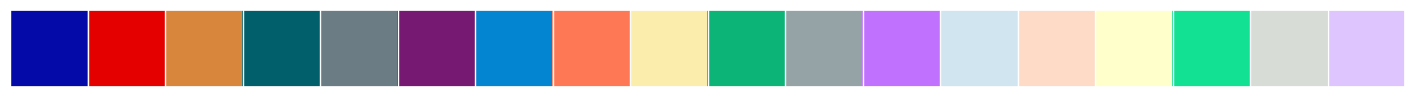

In [32]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [33]:
iris = pd.read_csv('../donnees/Iris.csv').iloc[:,1:]
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [34]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
iris.SepalLengthCm.unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [36]:
donnees = iris.melt(id_vars=['Species'], value_vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

In [37]:
donnees.head()

Species       variable  value
0  Iris-setosa  SepalLengthCm    5.1
1  Iris-setosa  SepalLengthCm    4.9
2  Iris-setosa  SepalLengthCm    4.7
3  Iris-setosa  SepalLengthCm    4.6
4  Iris-setosa  SepalLengthCm    5.0

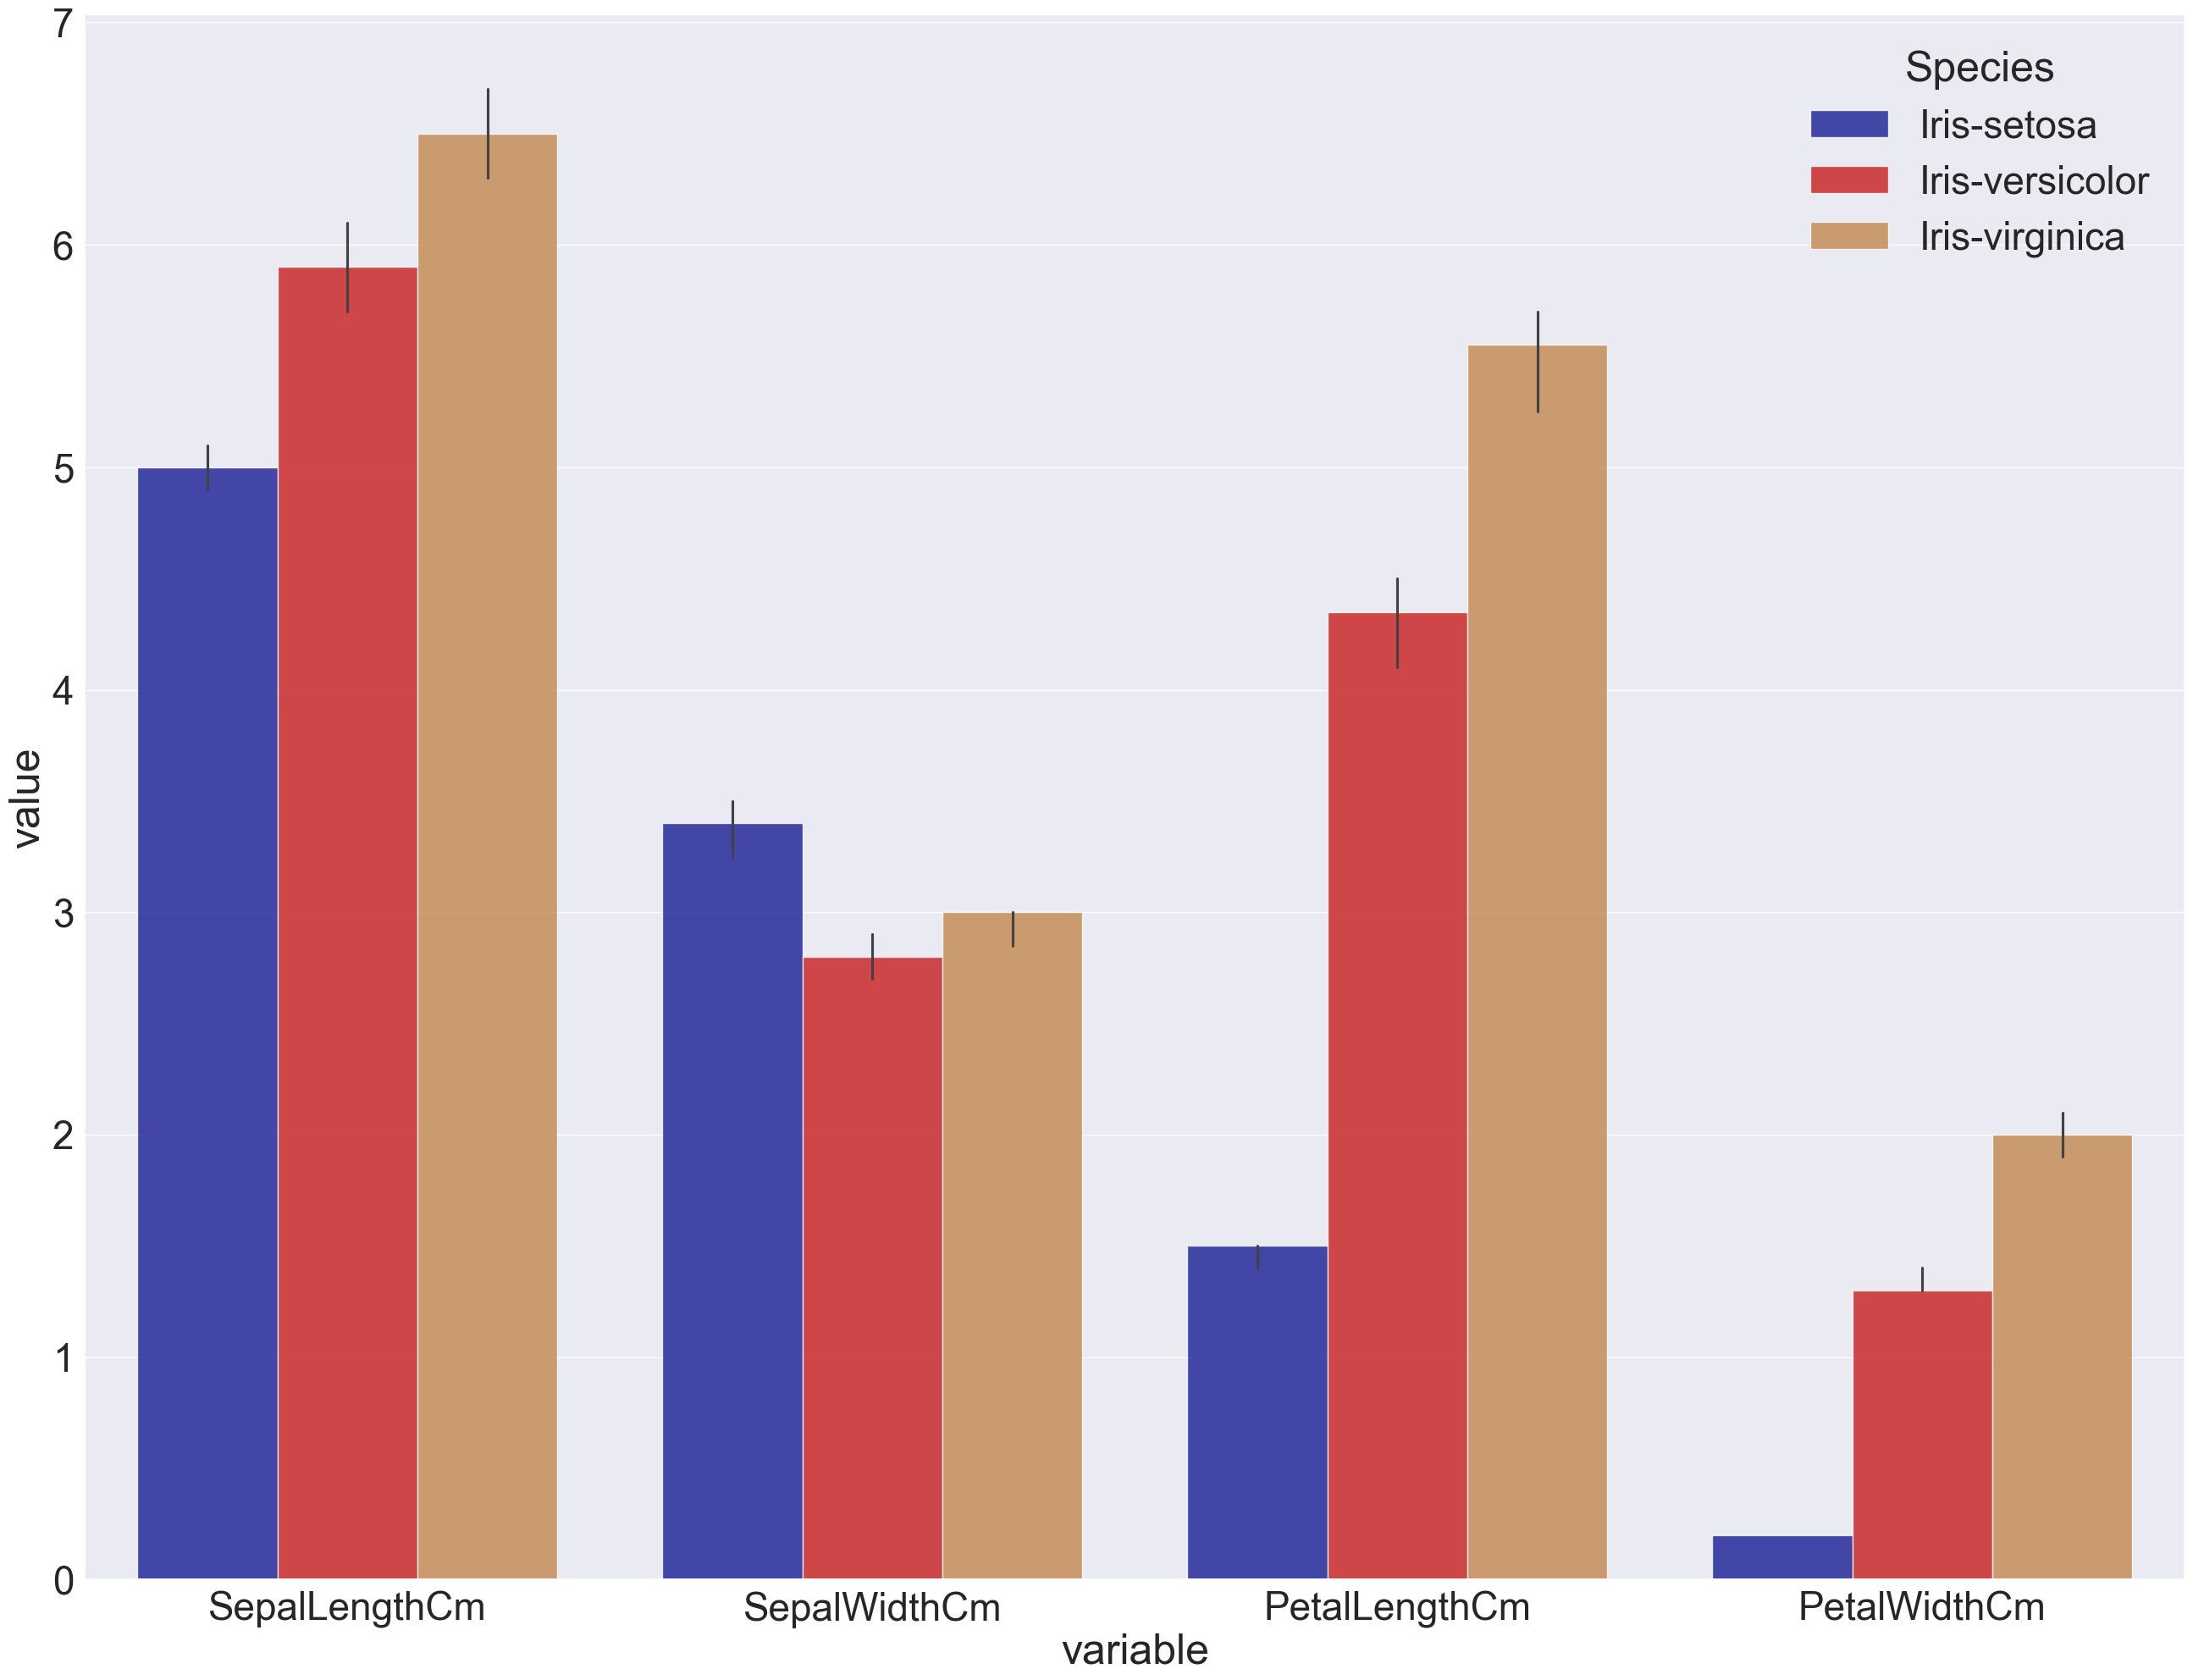

In [39]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='variable',y='value',hue='Species', data=donnees,palette=palette,alpha=0.8,estimator='median')

# Statistiques

In [14]:
iris[iris.Species== 'Iris-setosa'    ].describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         5.00600      3.418000       1.464000       0.24400
std          0.35249      0.381024       0.173511       0.10721
min          4.30000      2.300000       1.000000       0.10000
25%          4.80000      3.125000       1.400000       0.20000
50%          5.00000      3.400000       1.500000       0.20000
75%          5.20000      3.675000       1.575000       0.30000
max          5.80000      4.400000       1.900000       0.60000

In [15]:
iris[iris.Species== 'Iris-versicolor'].describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      50.000000     50.000000      50.000000     50.000000
mean        5.936000      2.770000       4.260000      1.326000
std         0.516171      0.313798       0.469911      0.197753
min         4.900000      2.000000       3.000000      1.000000
25%         5.600000      2.525000       4.000000      1.200000
50%         5.900000      2.800000       4.350000      1.300000
75%         6.300000      3.000000       4.600000      1.500000
max         7.000000      3.400000       5.100000      1.800000

In [16]:
iris[iris.Species== 'Iris-virginica' ].describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count       50.00000     50.000000      50.000000      50.00000
mean         6.58800      2.974000       5.552000       2.02600
std          0.63588      0.322497       0.551895       0.27465
min          4.90000      2.200000       4.500000       1.40000
25%          6.22500      2.800000       5.100000       1.80000
50%          6.50000      3.000000       5.550000       2.00000
75%          6.90000      3.175000       5.875000       2.30000
max          7.90000      3.800000       6.900000       2.50000

# Les distributions des variables quantitatives

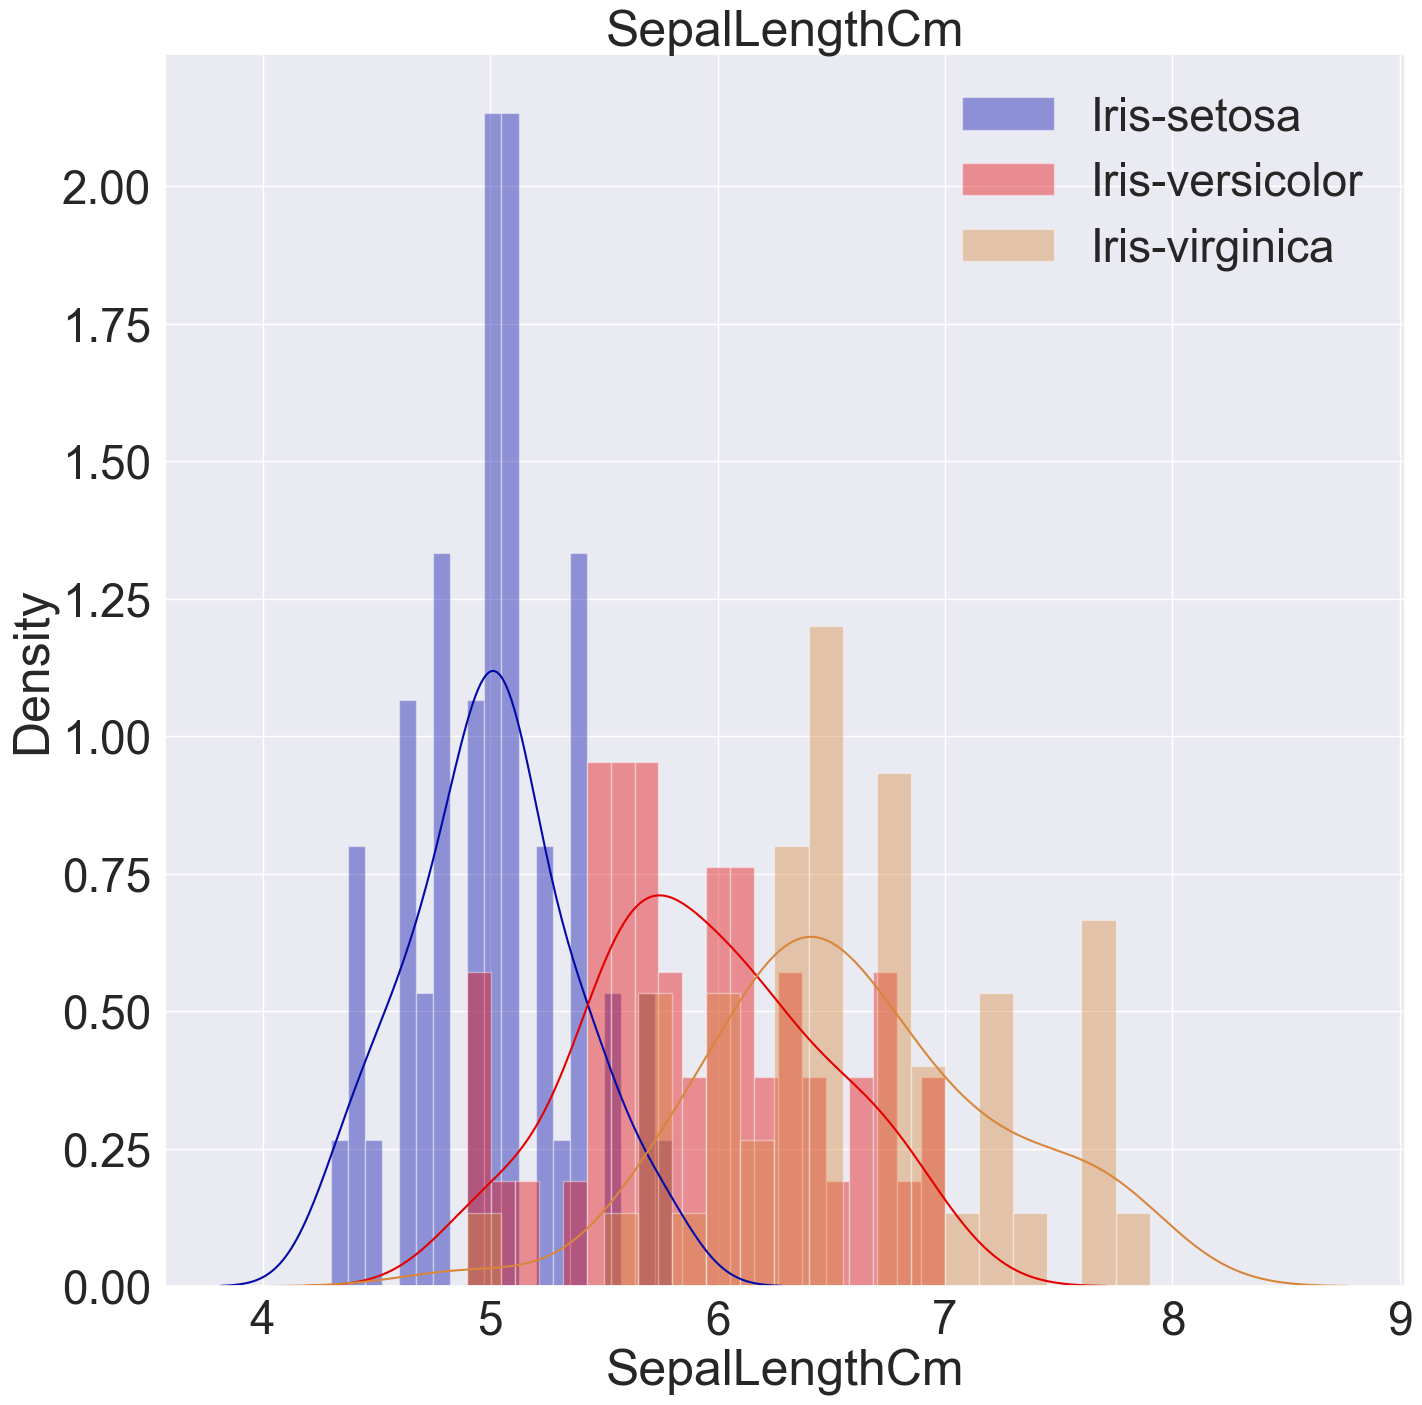

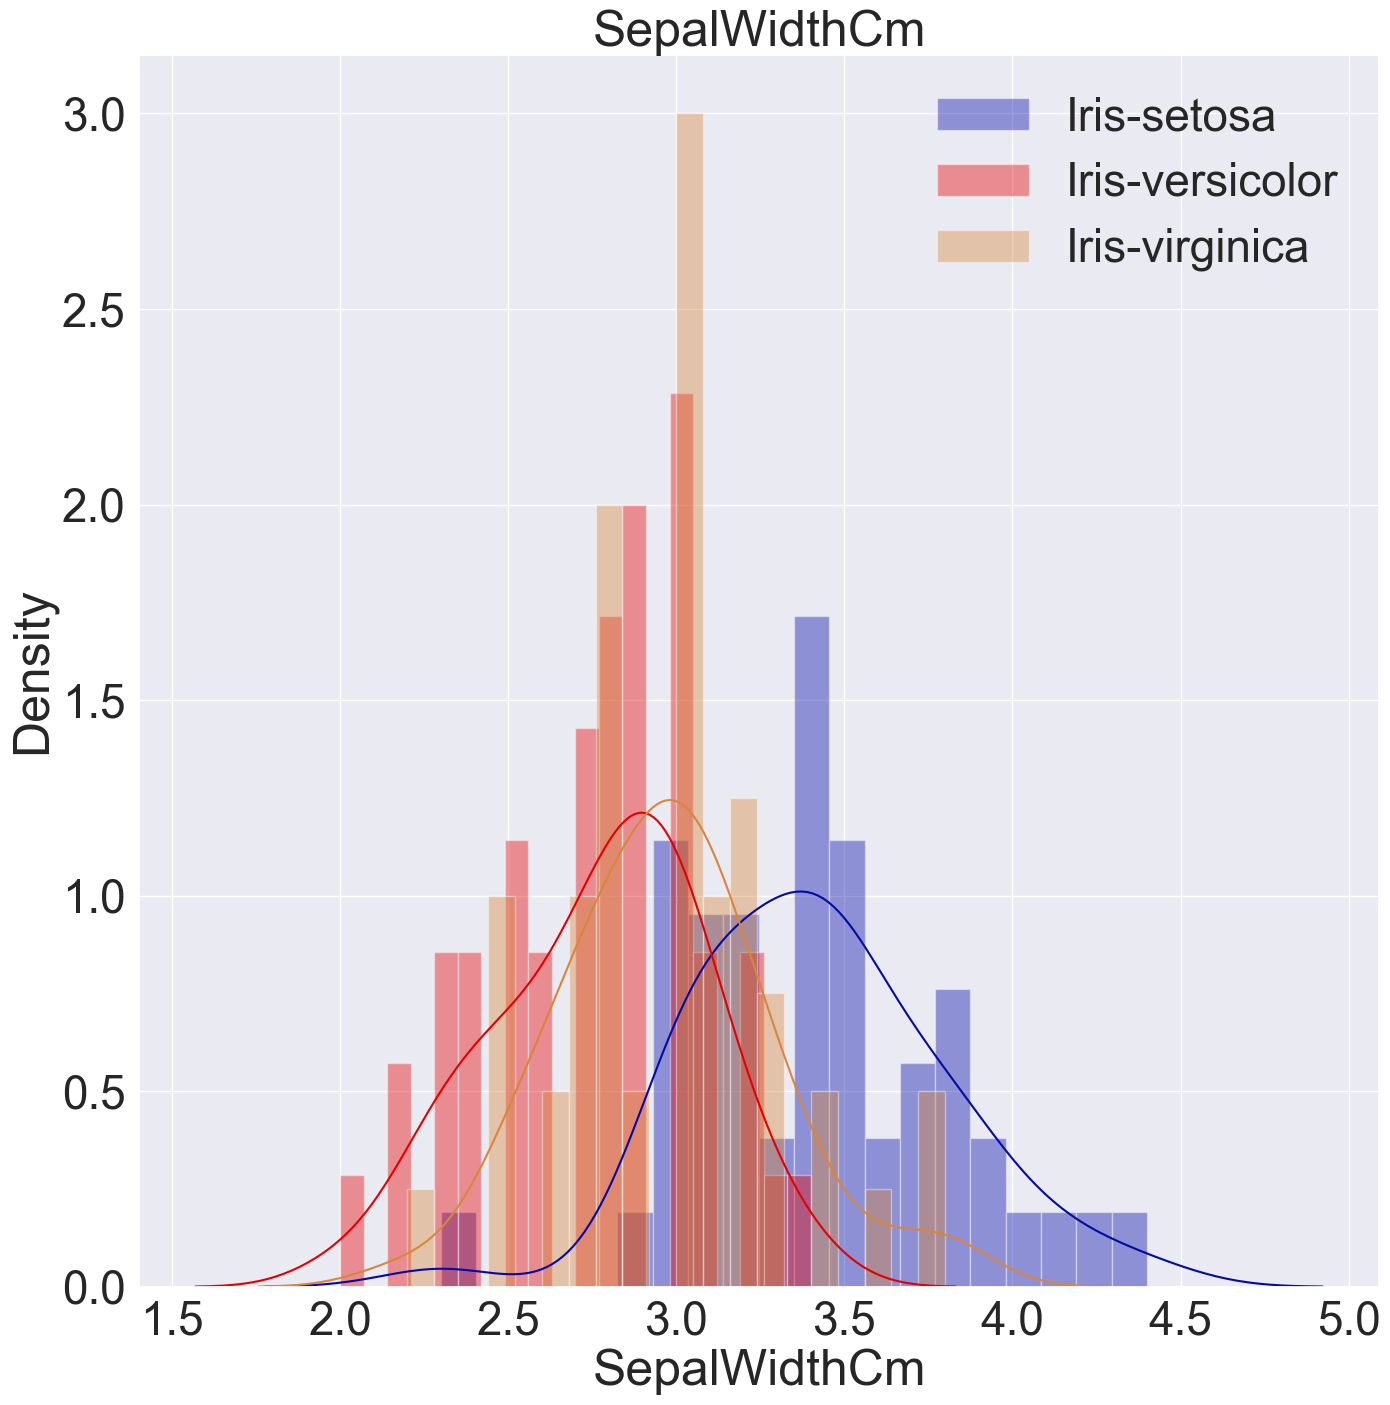

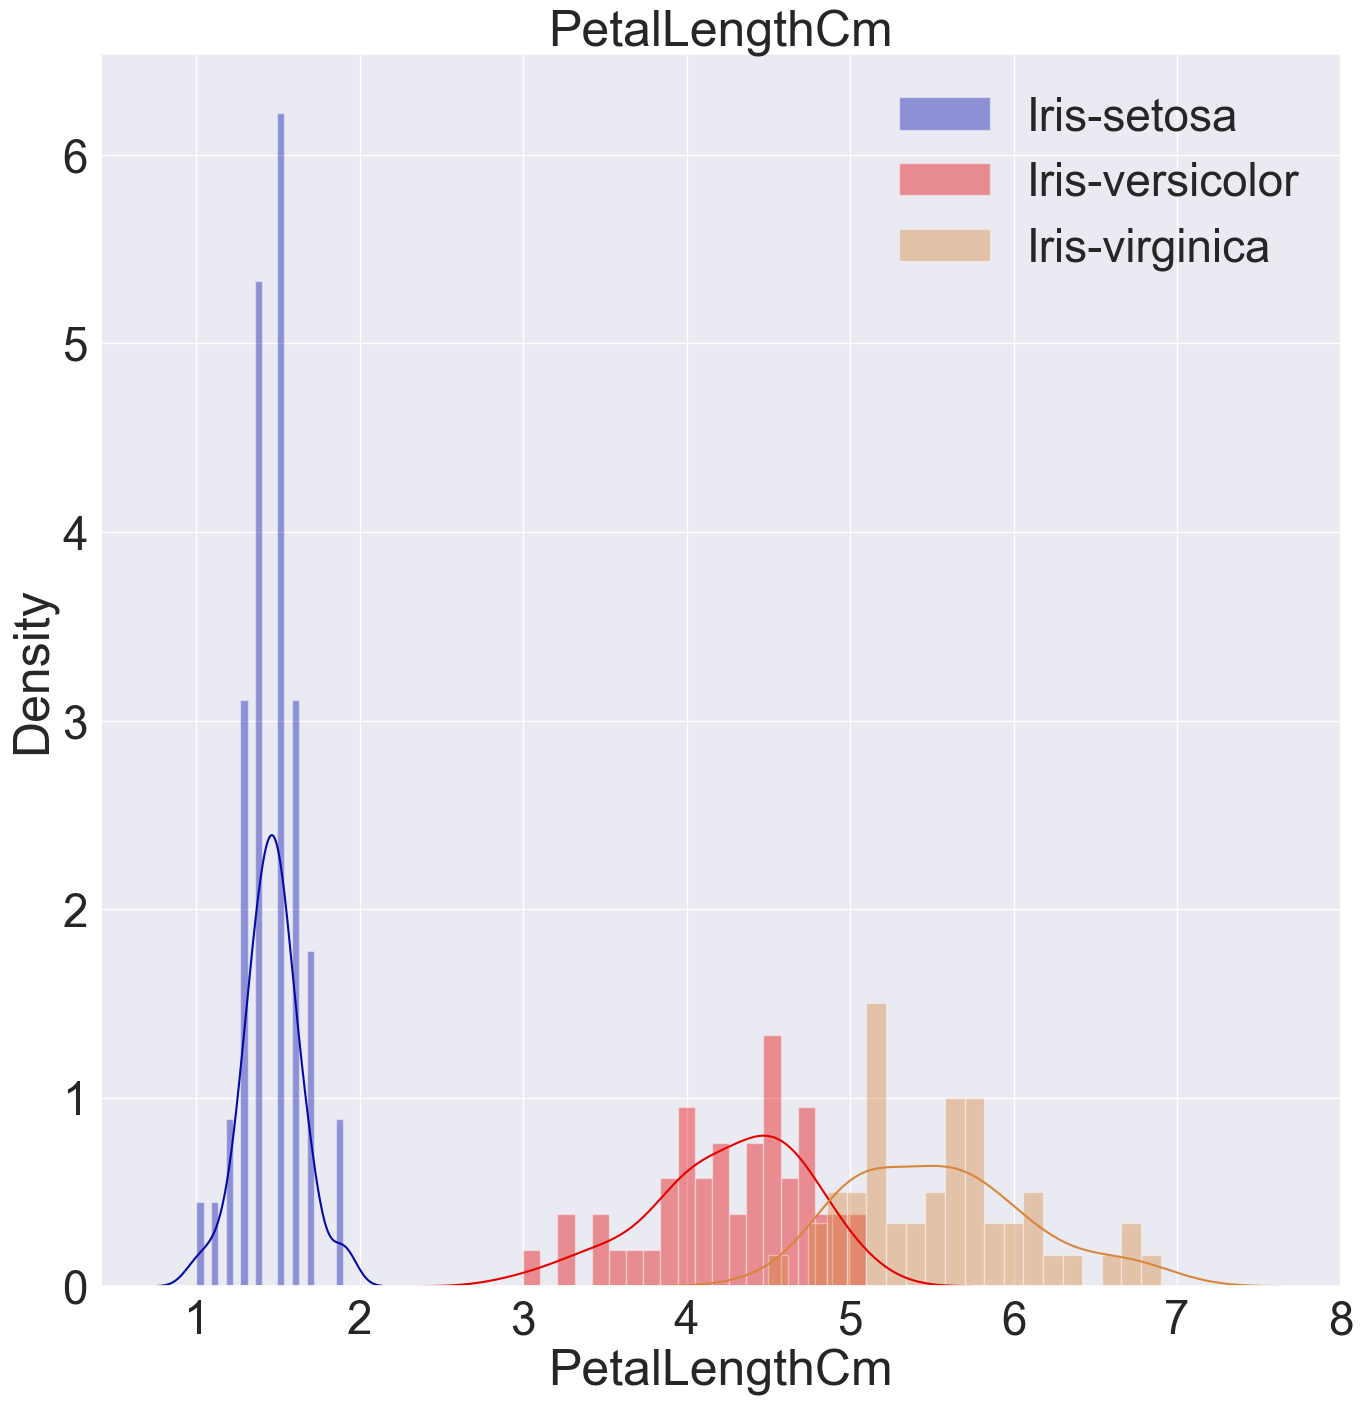

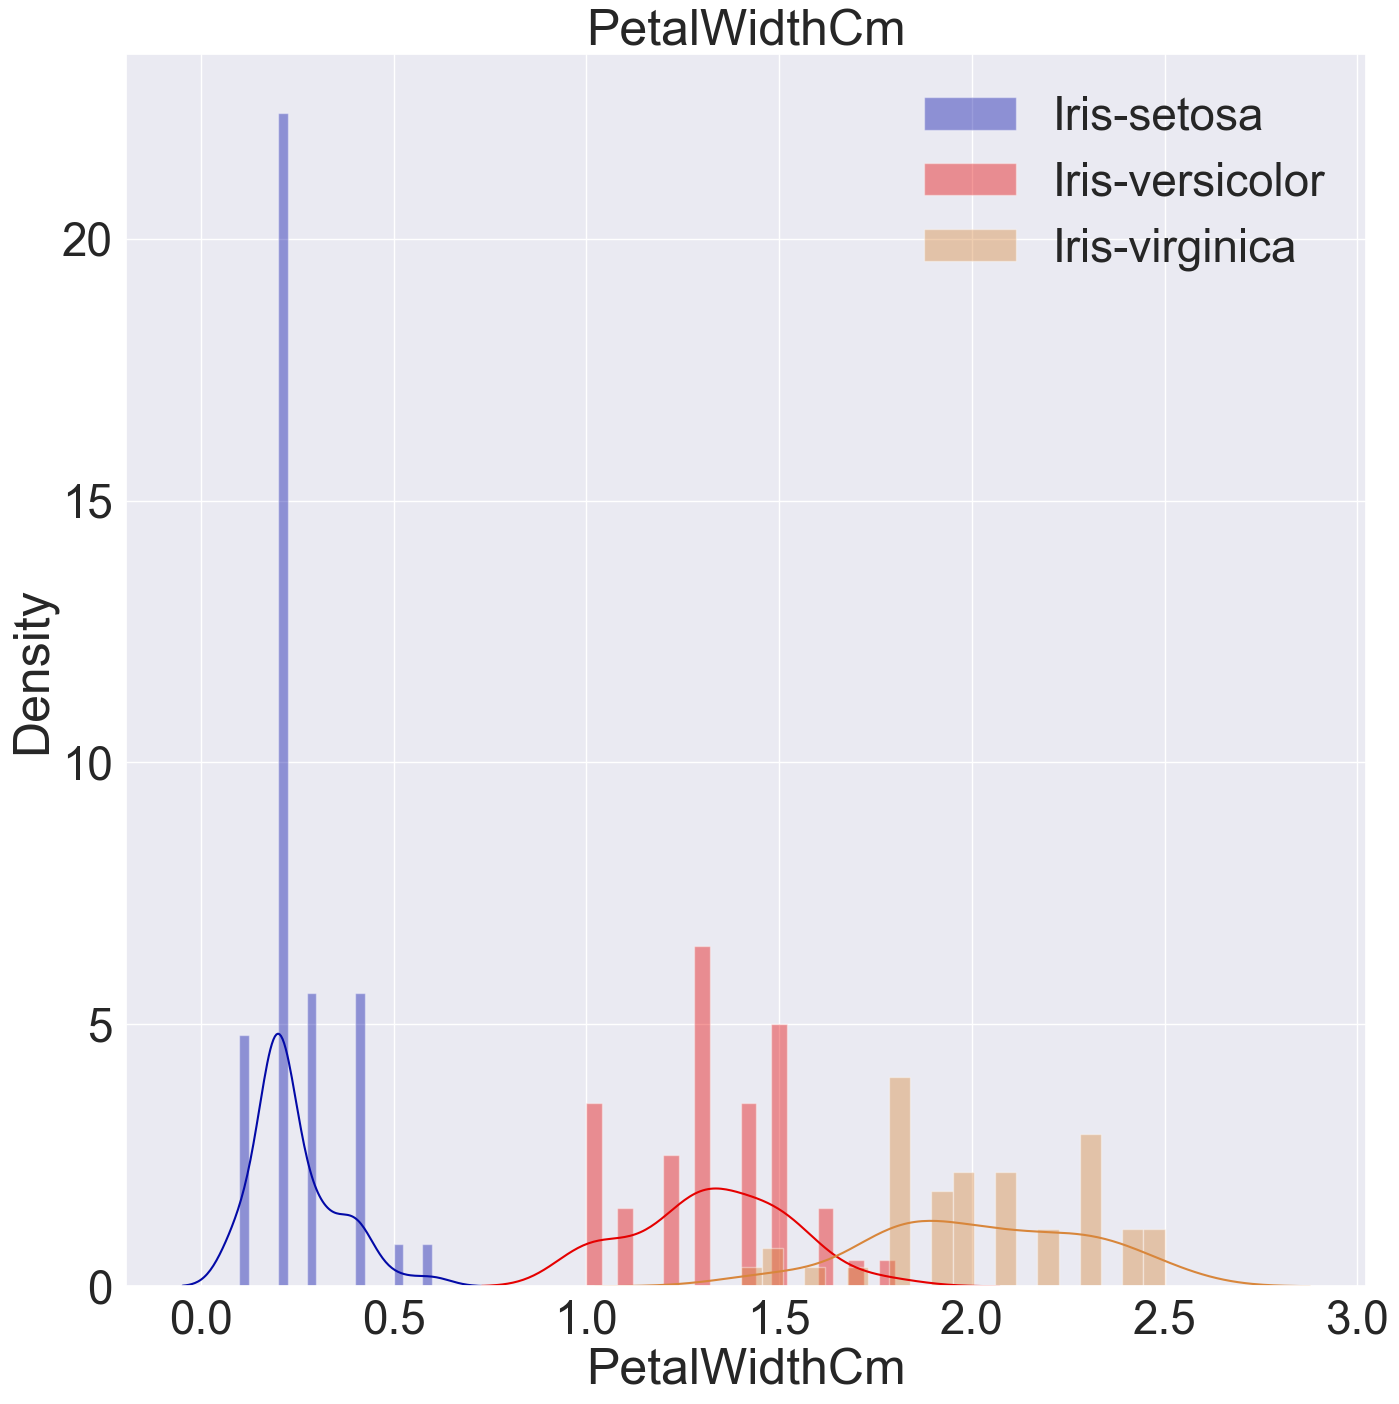

In [4]:
for colonne in iris.columns[:-1]:
    plt.figure(figsize=(16,16))
    plt.title(colonne)
    sns.distplot(iris[colonne][iris.Species== 'Iris-setosa'    ],color=palette[0], label='Iris-setosa'    , hist_kws=dict(alpha=0.4),bins=20)
    sns.distplot(iris[colonne][iris.Species== 'Iris-versicolor'],color=palette[1], label='Iris-versicolor', hist_kws=dict(alpha=0.4),bins=20)
    sns.distplot(iris[colonne][iris.Species== 'Iris-virginica' ],color=palette[2], label='Iris-virginica' , hist_kws=dict(alpha=0.4),bins=20)
    plt.legend();

# BoxPlot

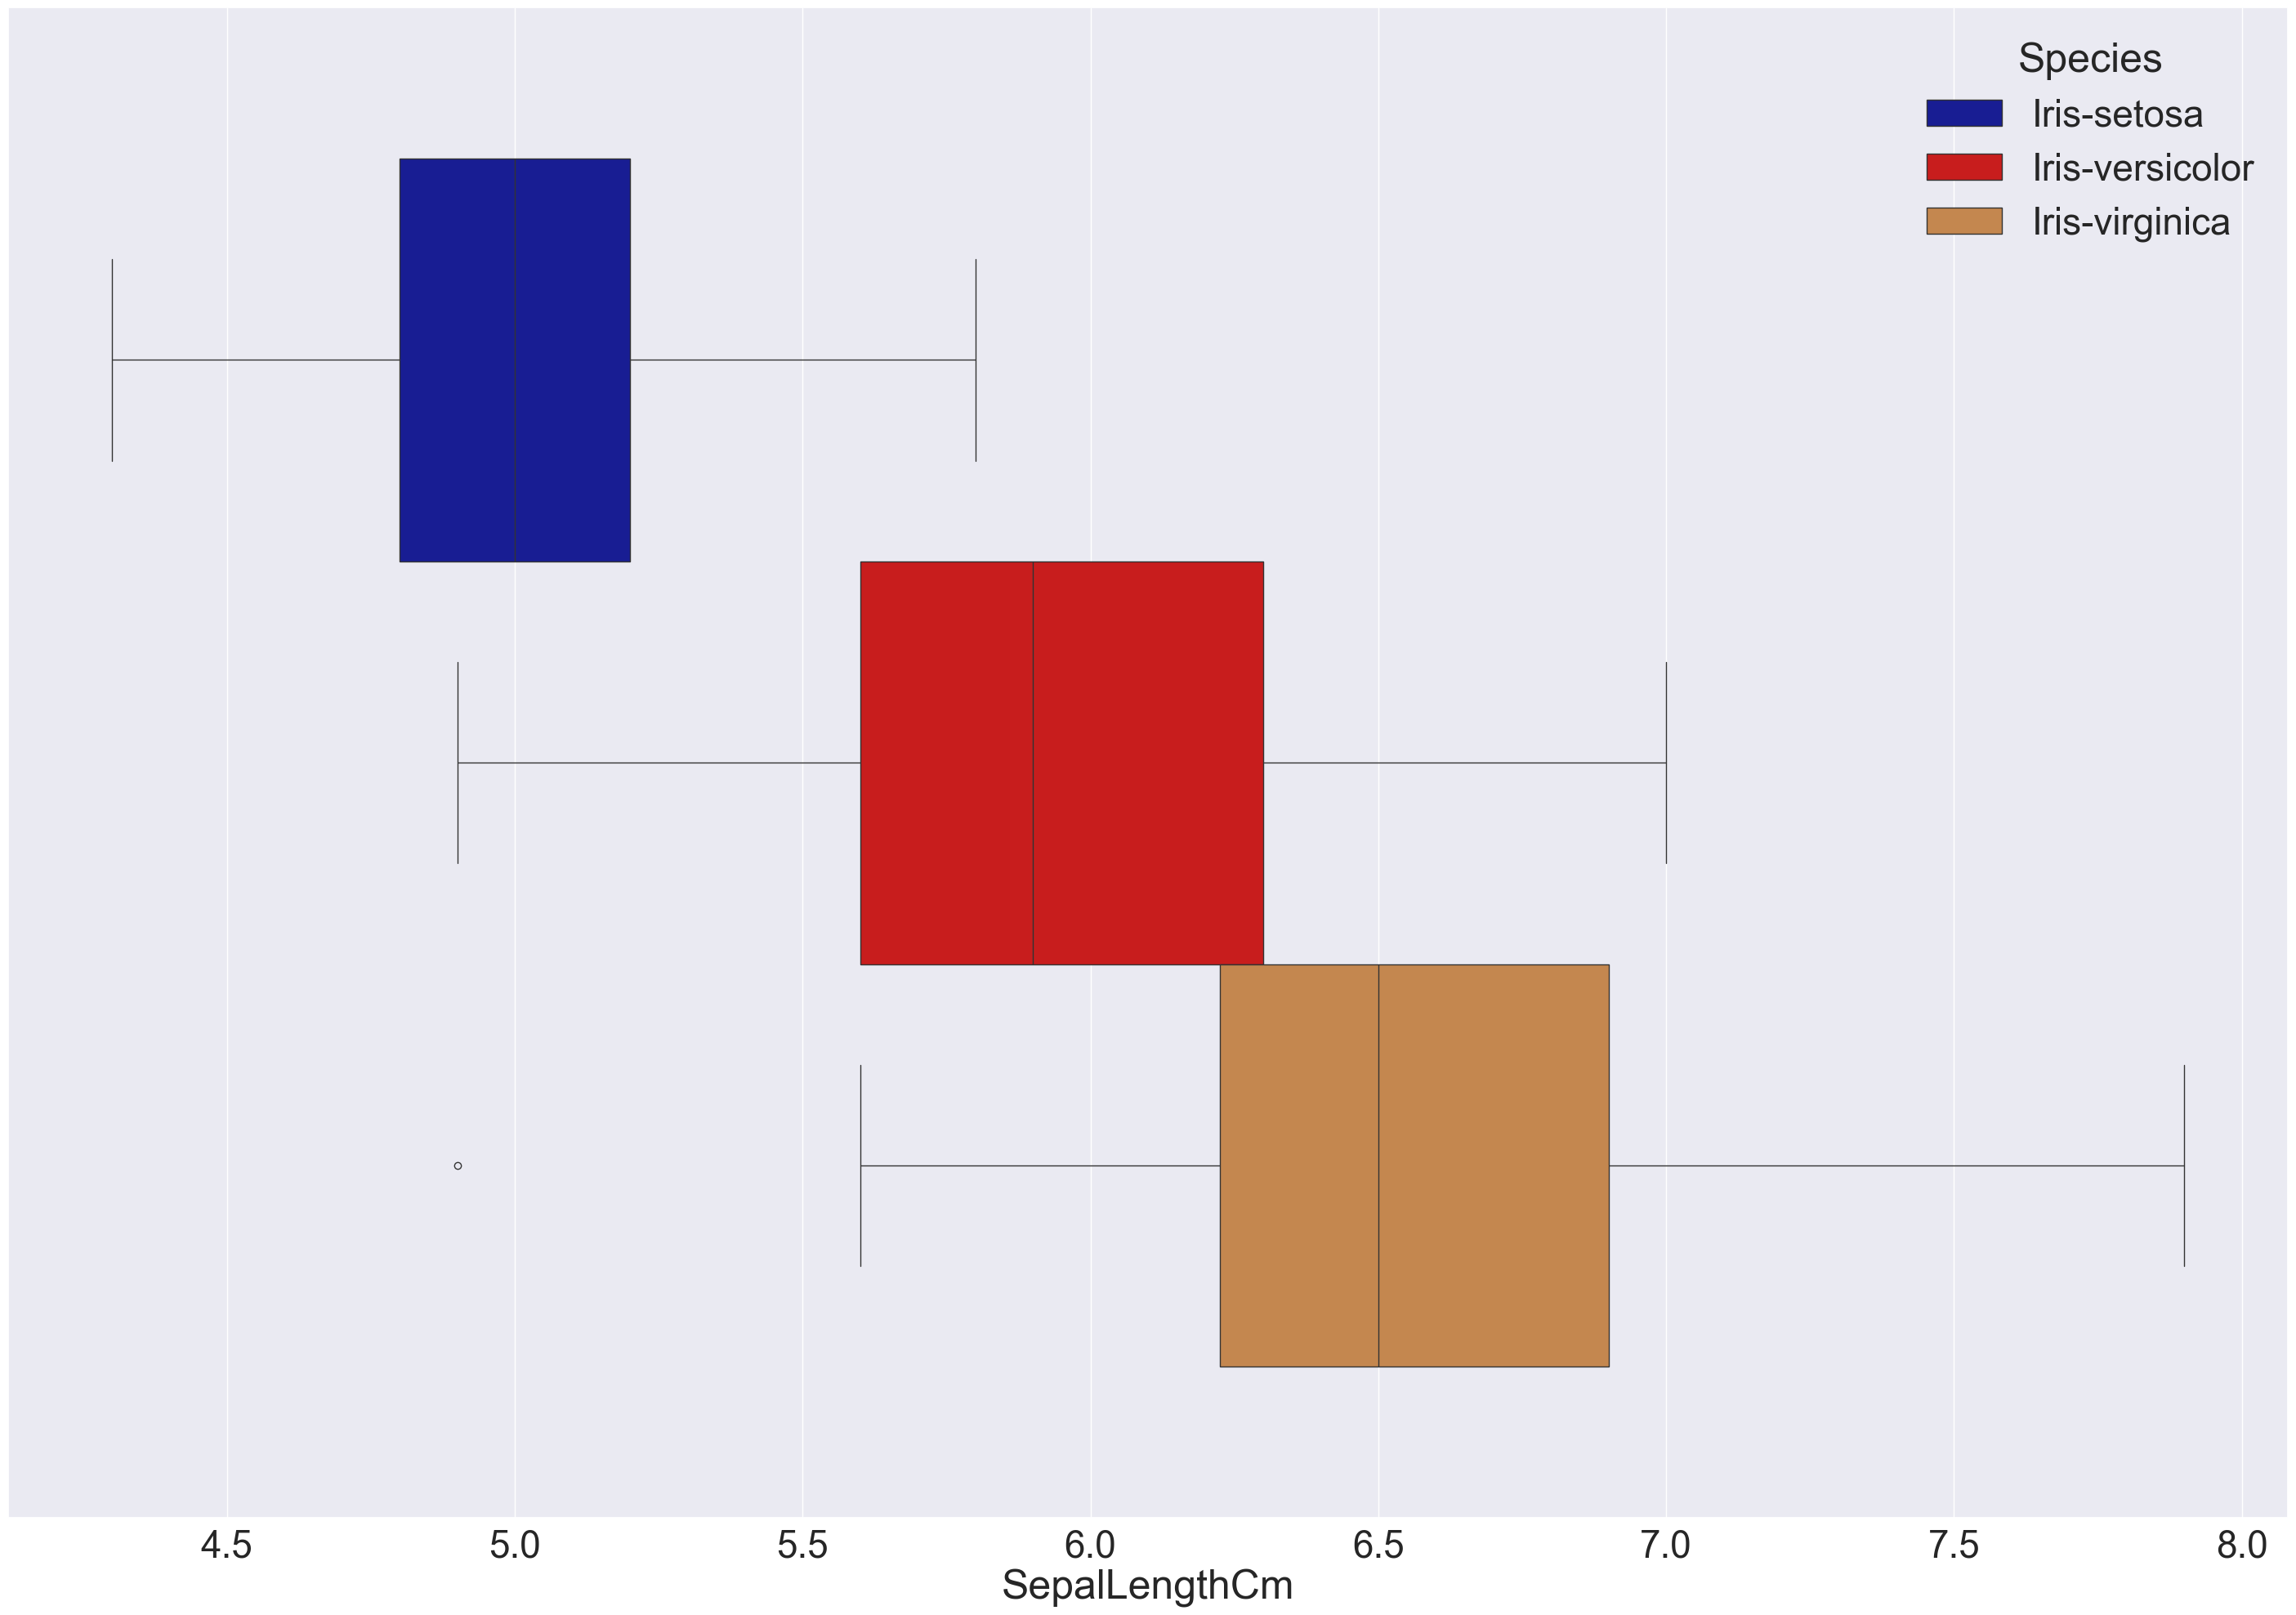

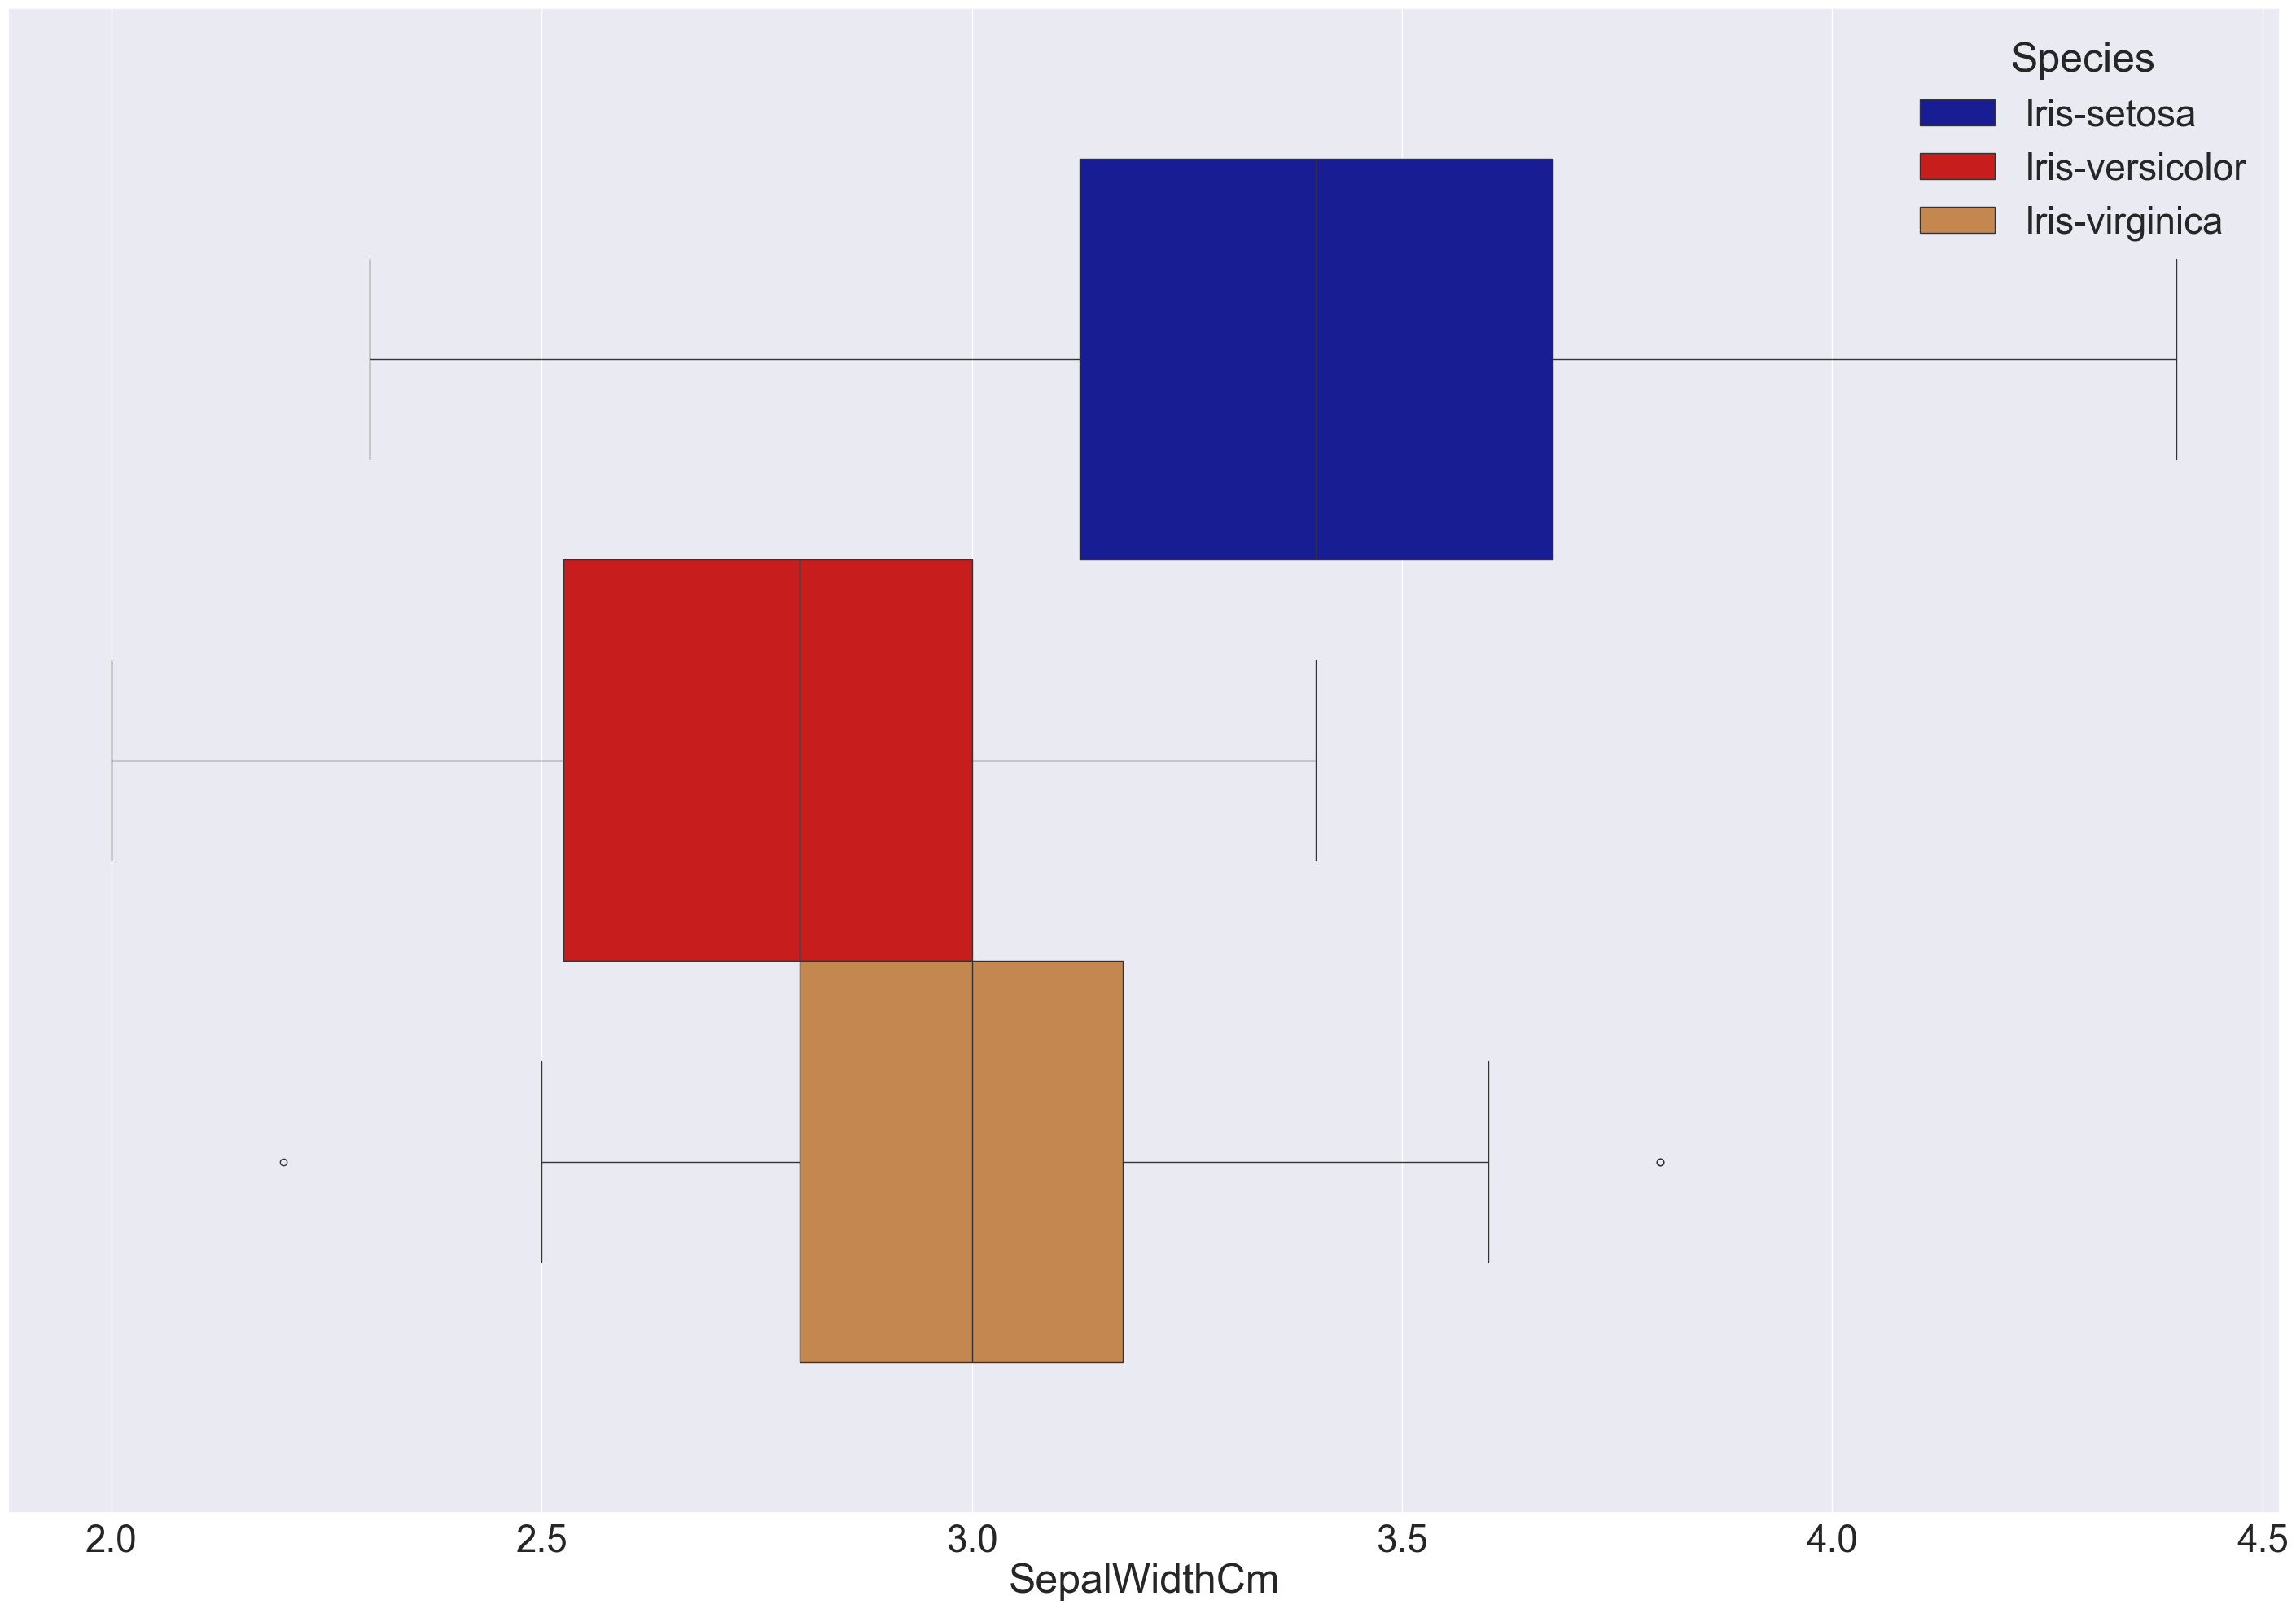

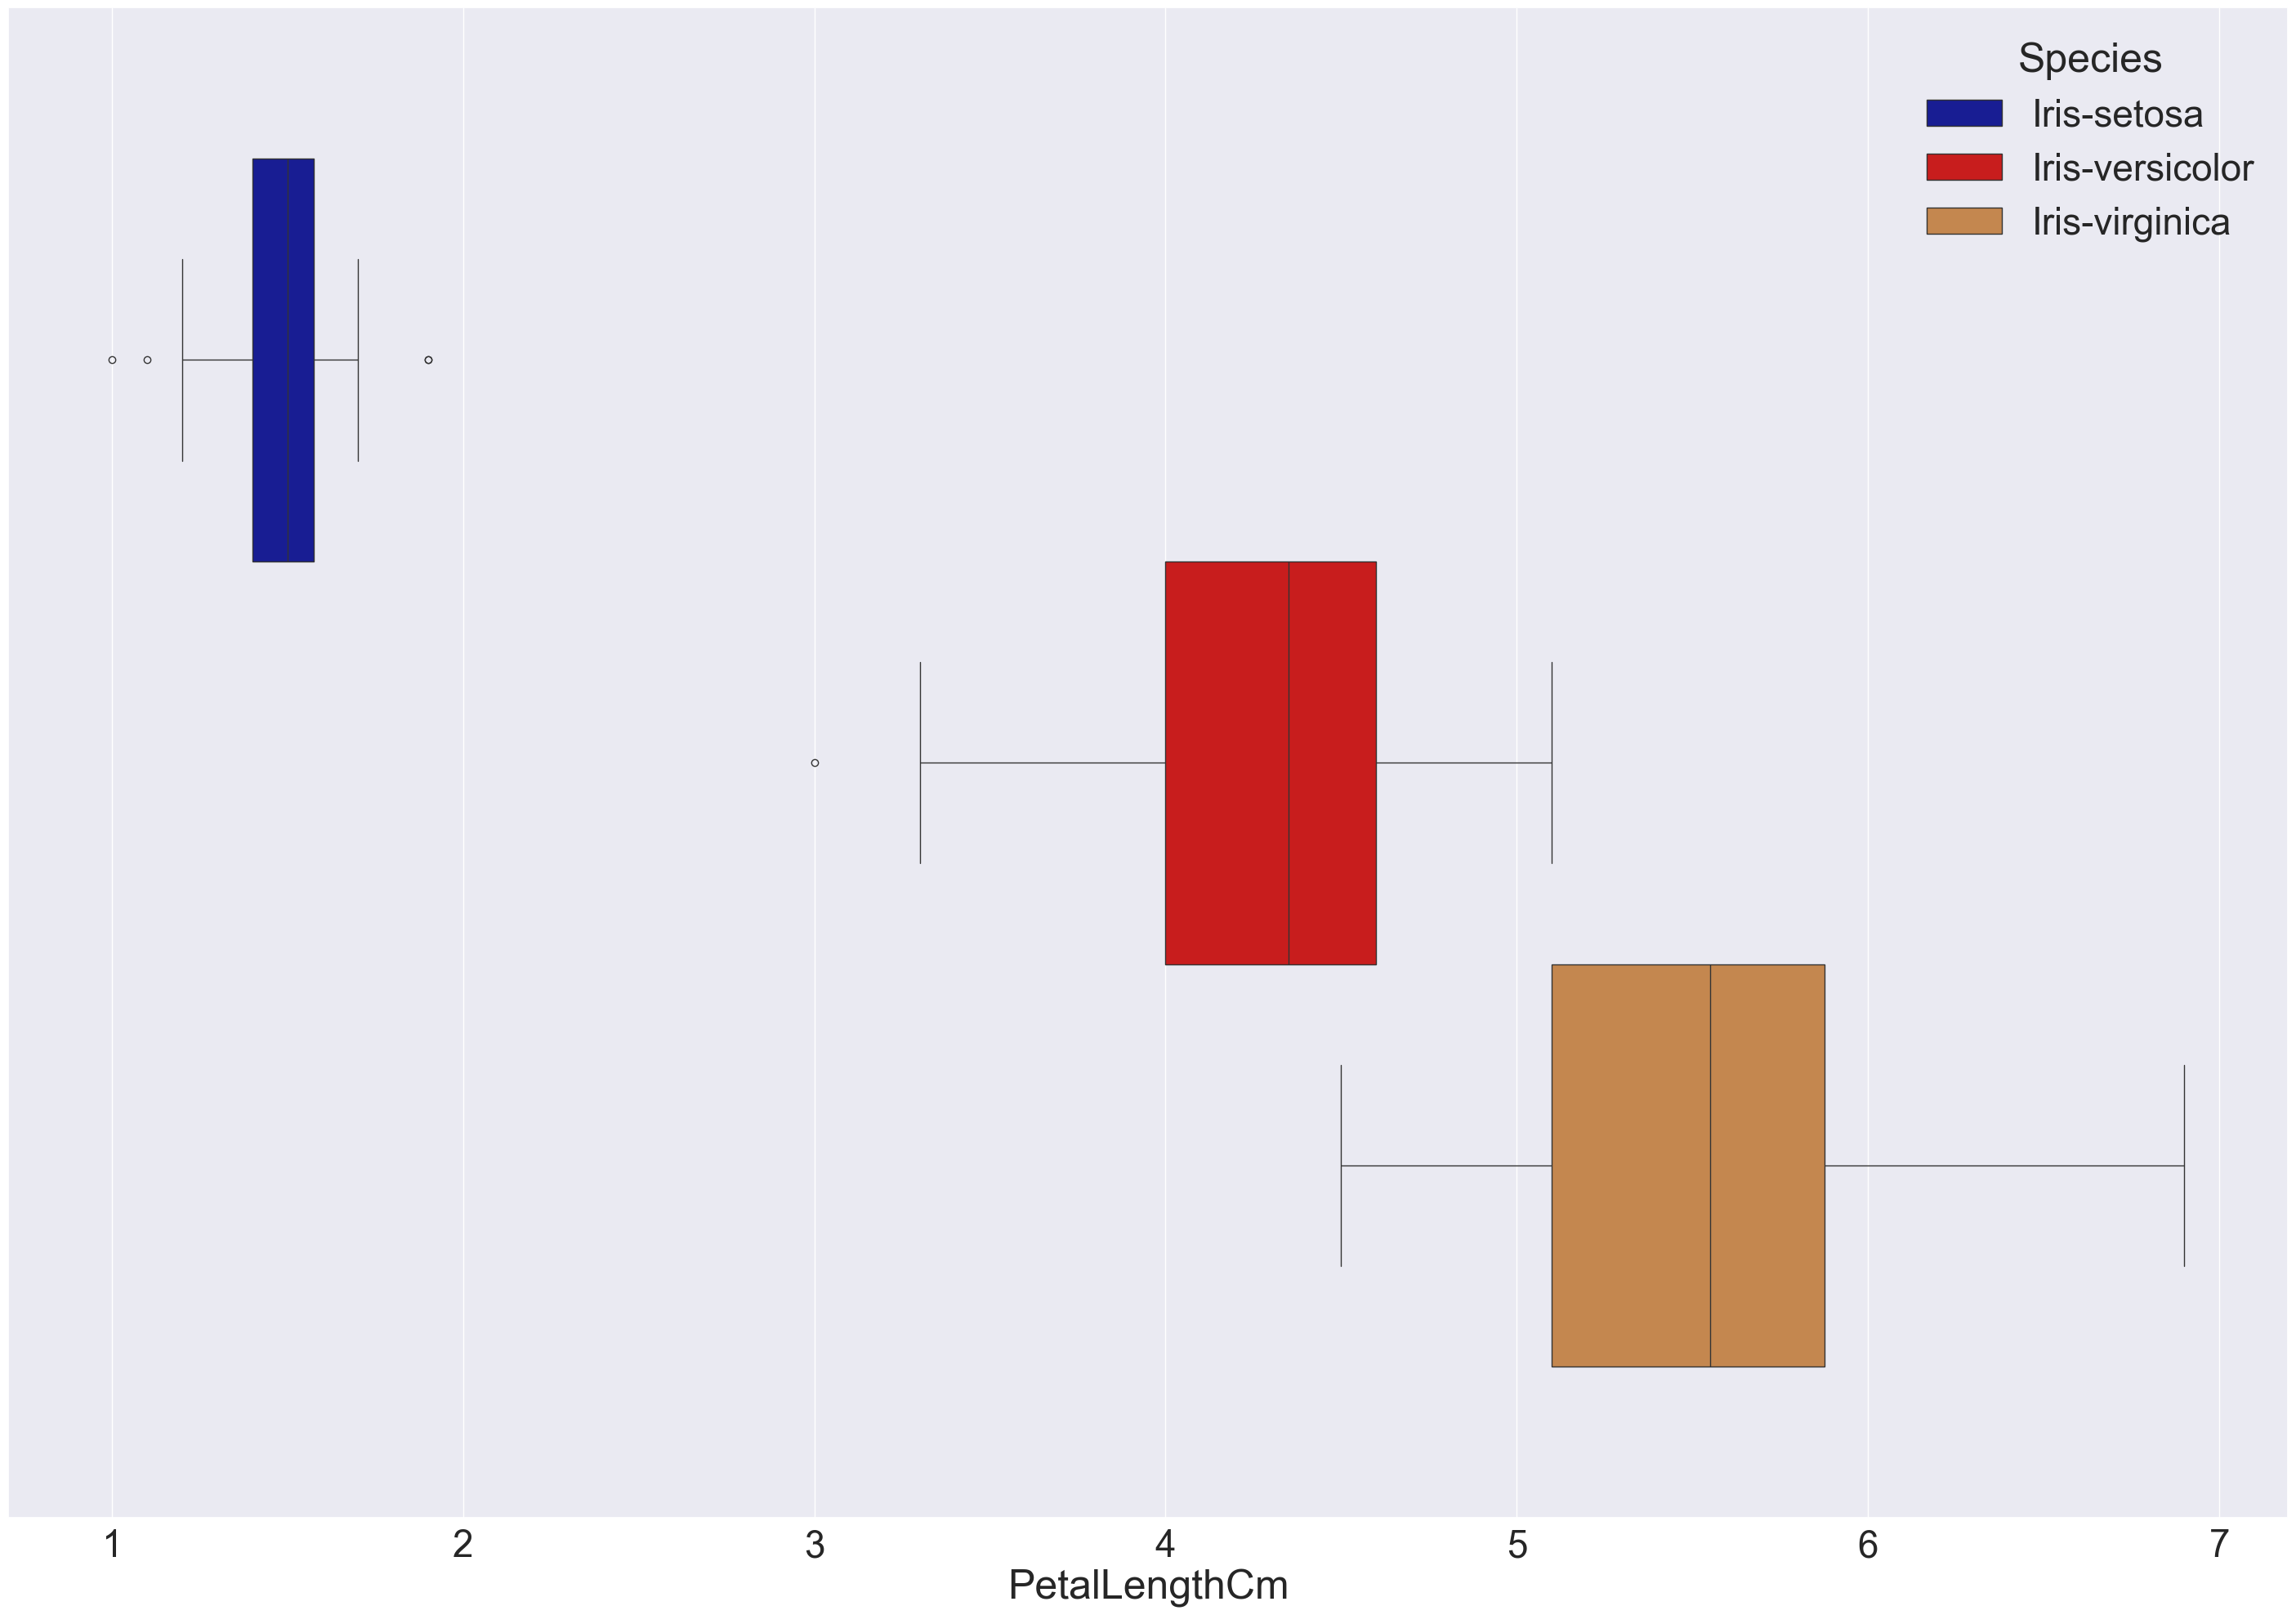

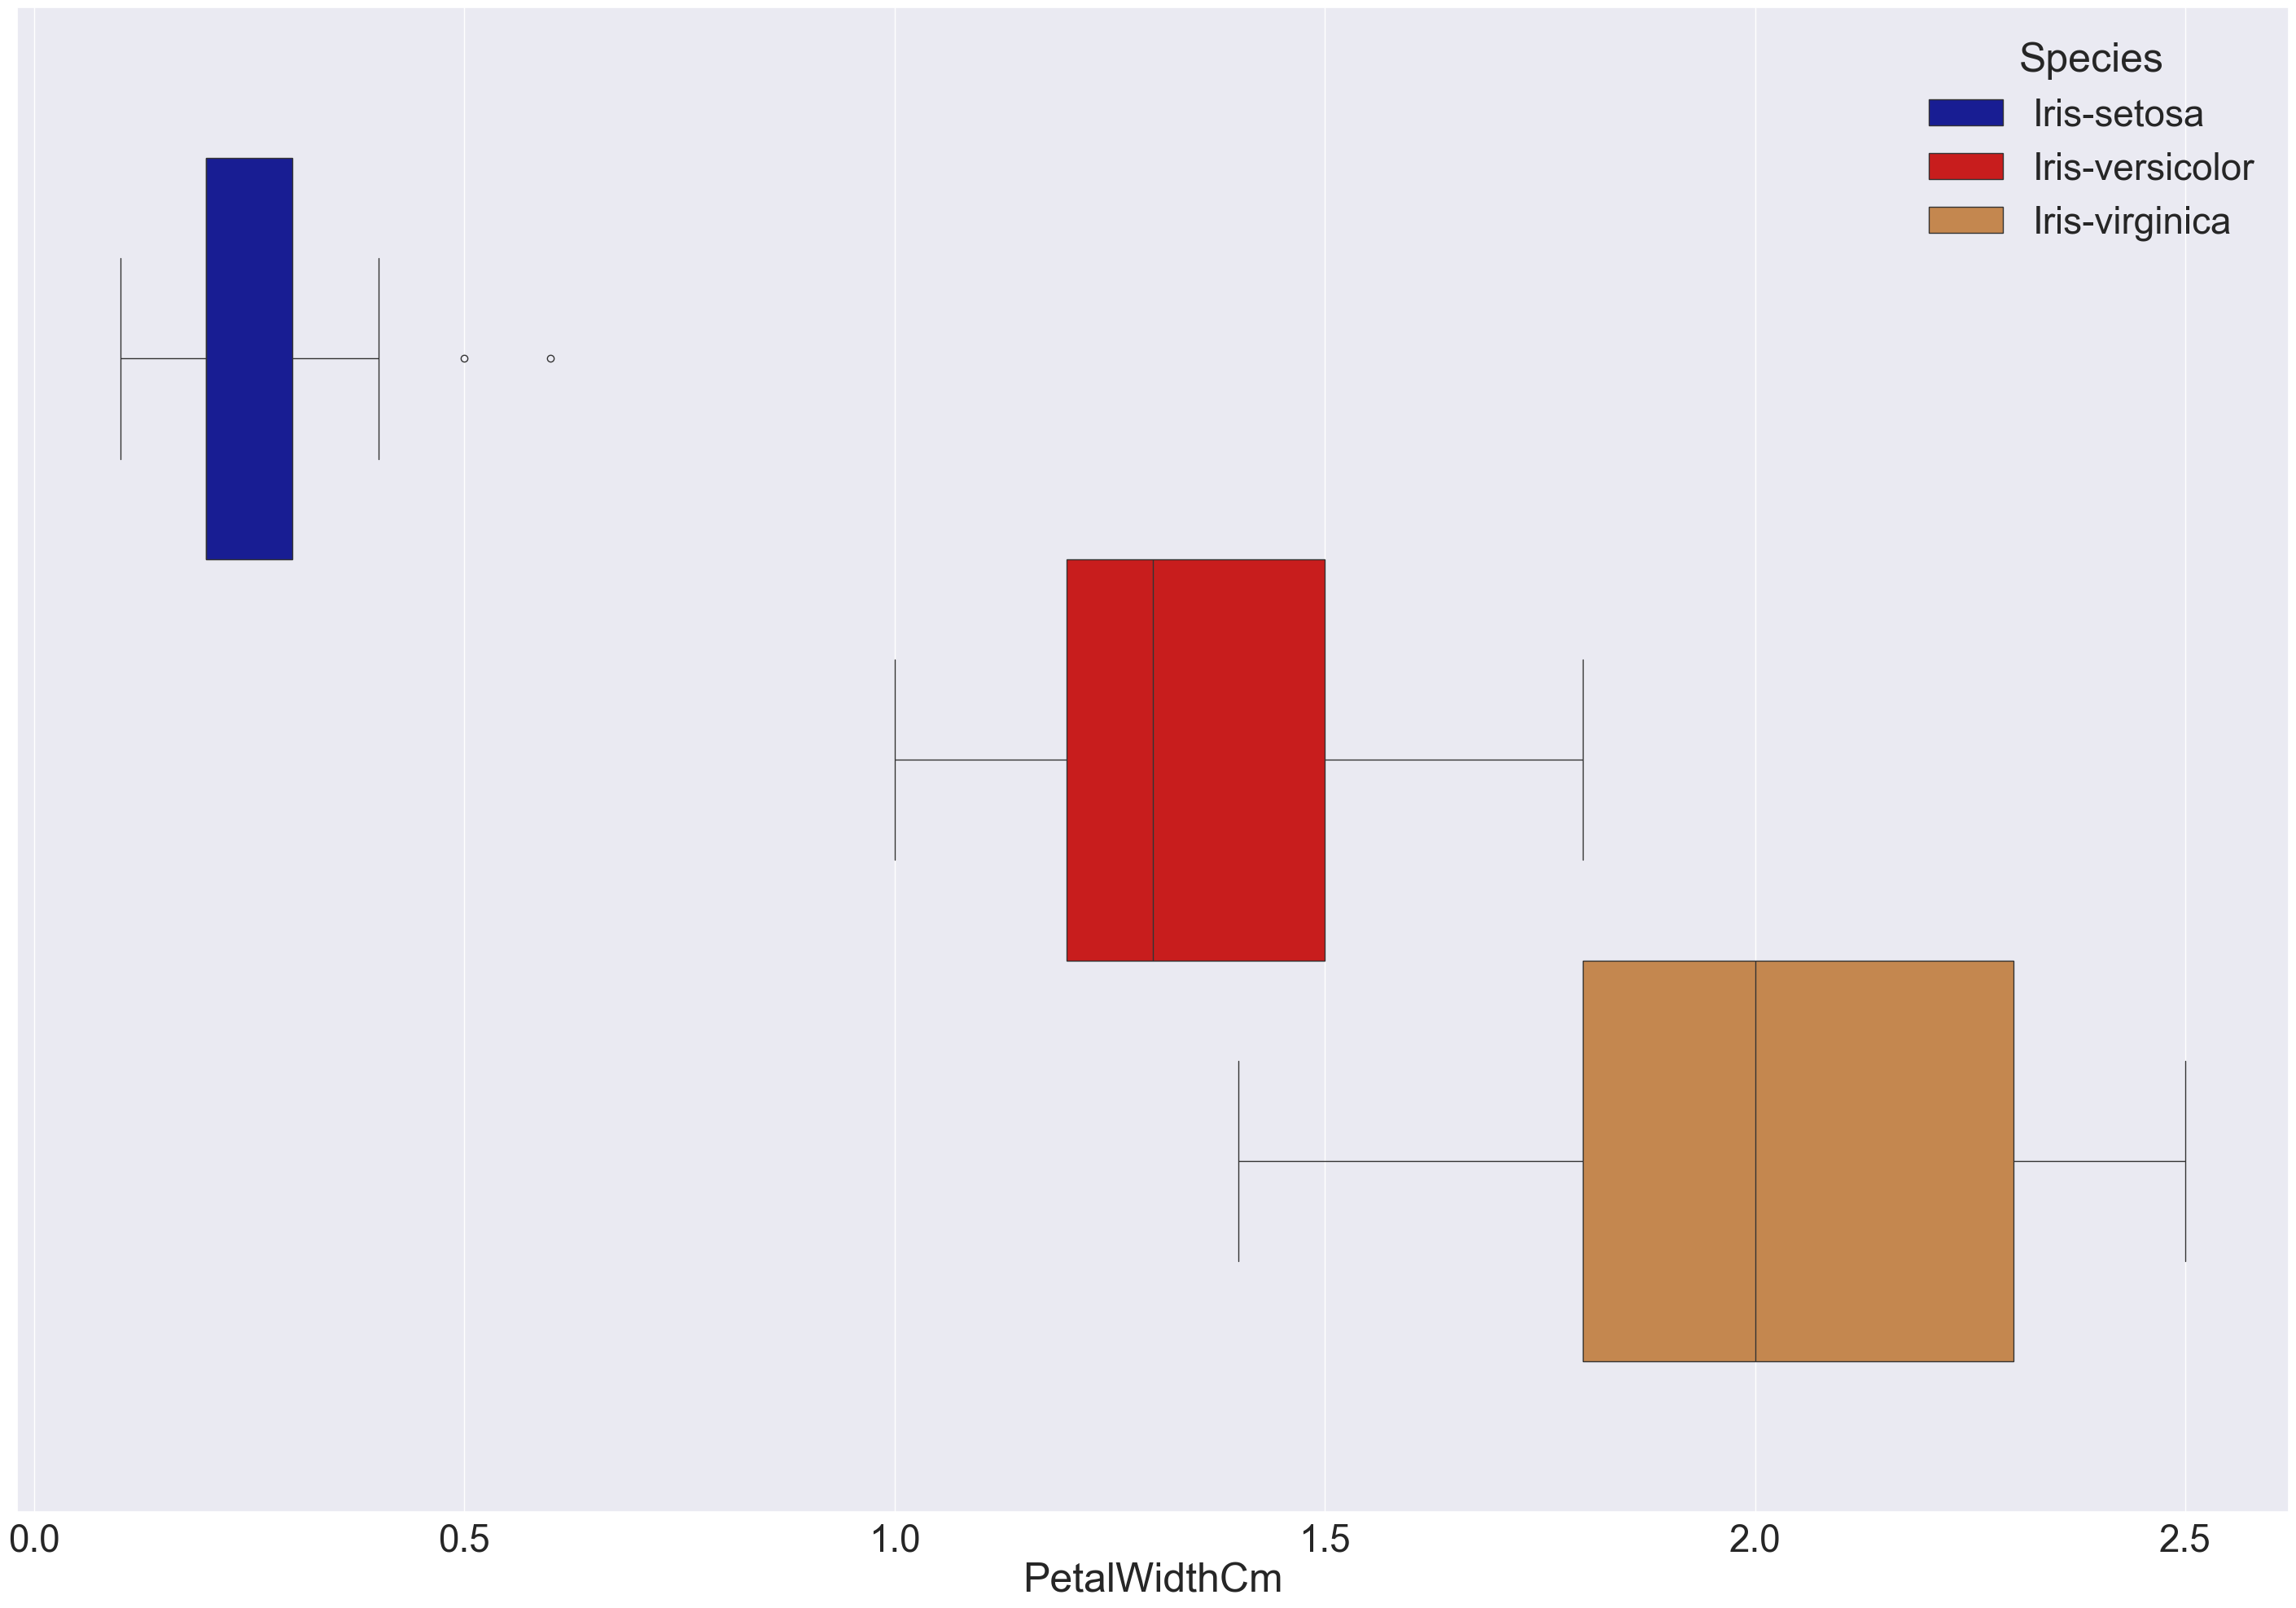

In [5]:
for colonne in iris.columns[:-1]:
    plt.figure(figsize=(36,24))
    sns.boxplot(x=colonne,data=iris,hue='Species', palette=palette);

In [6]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

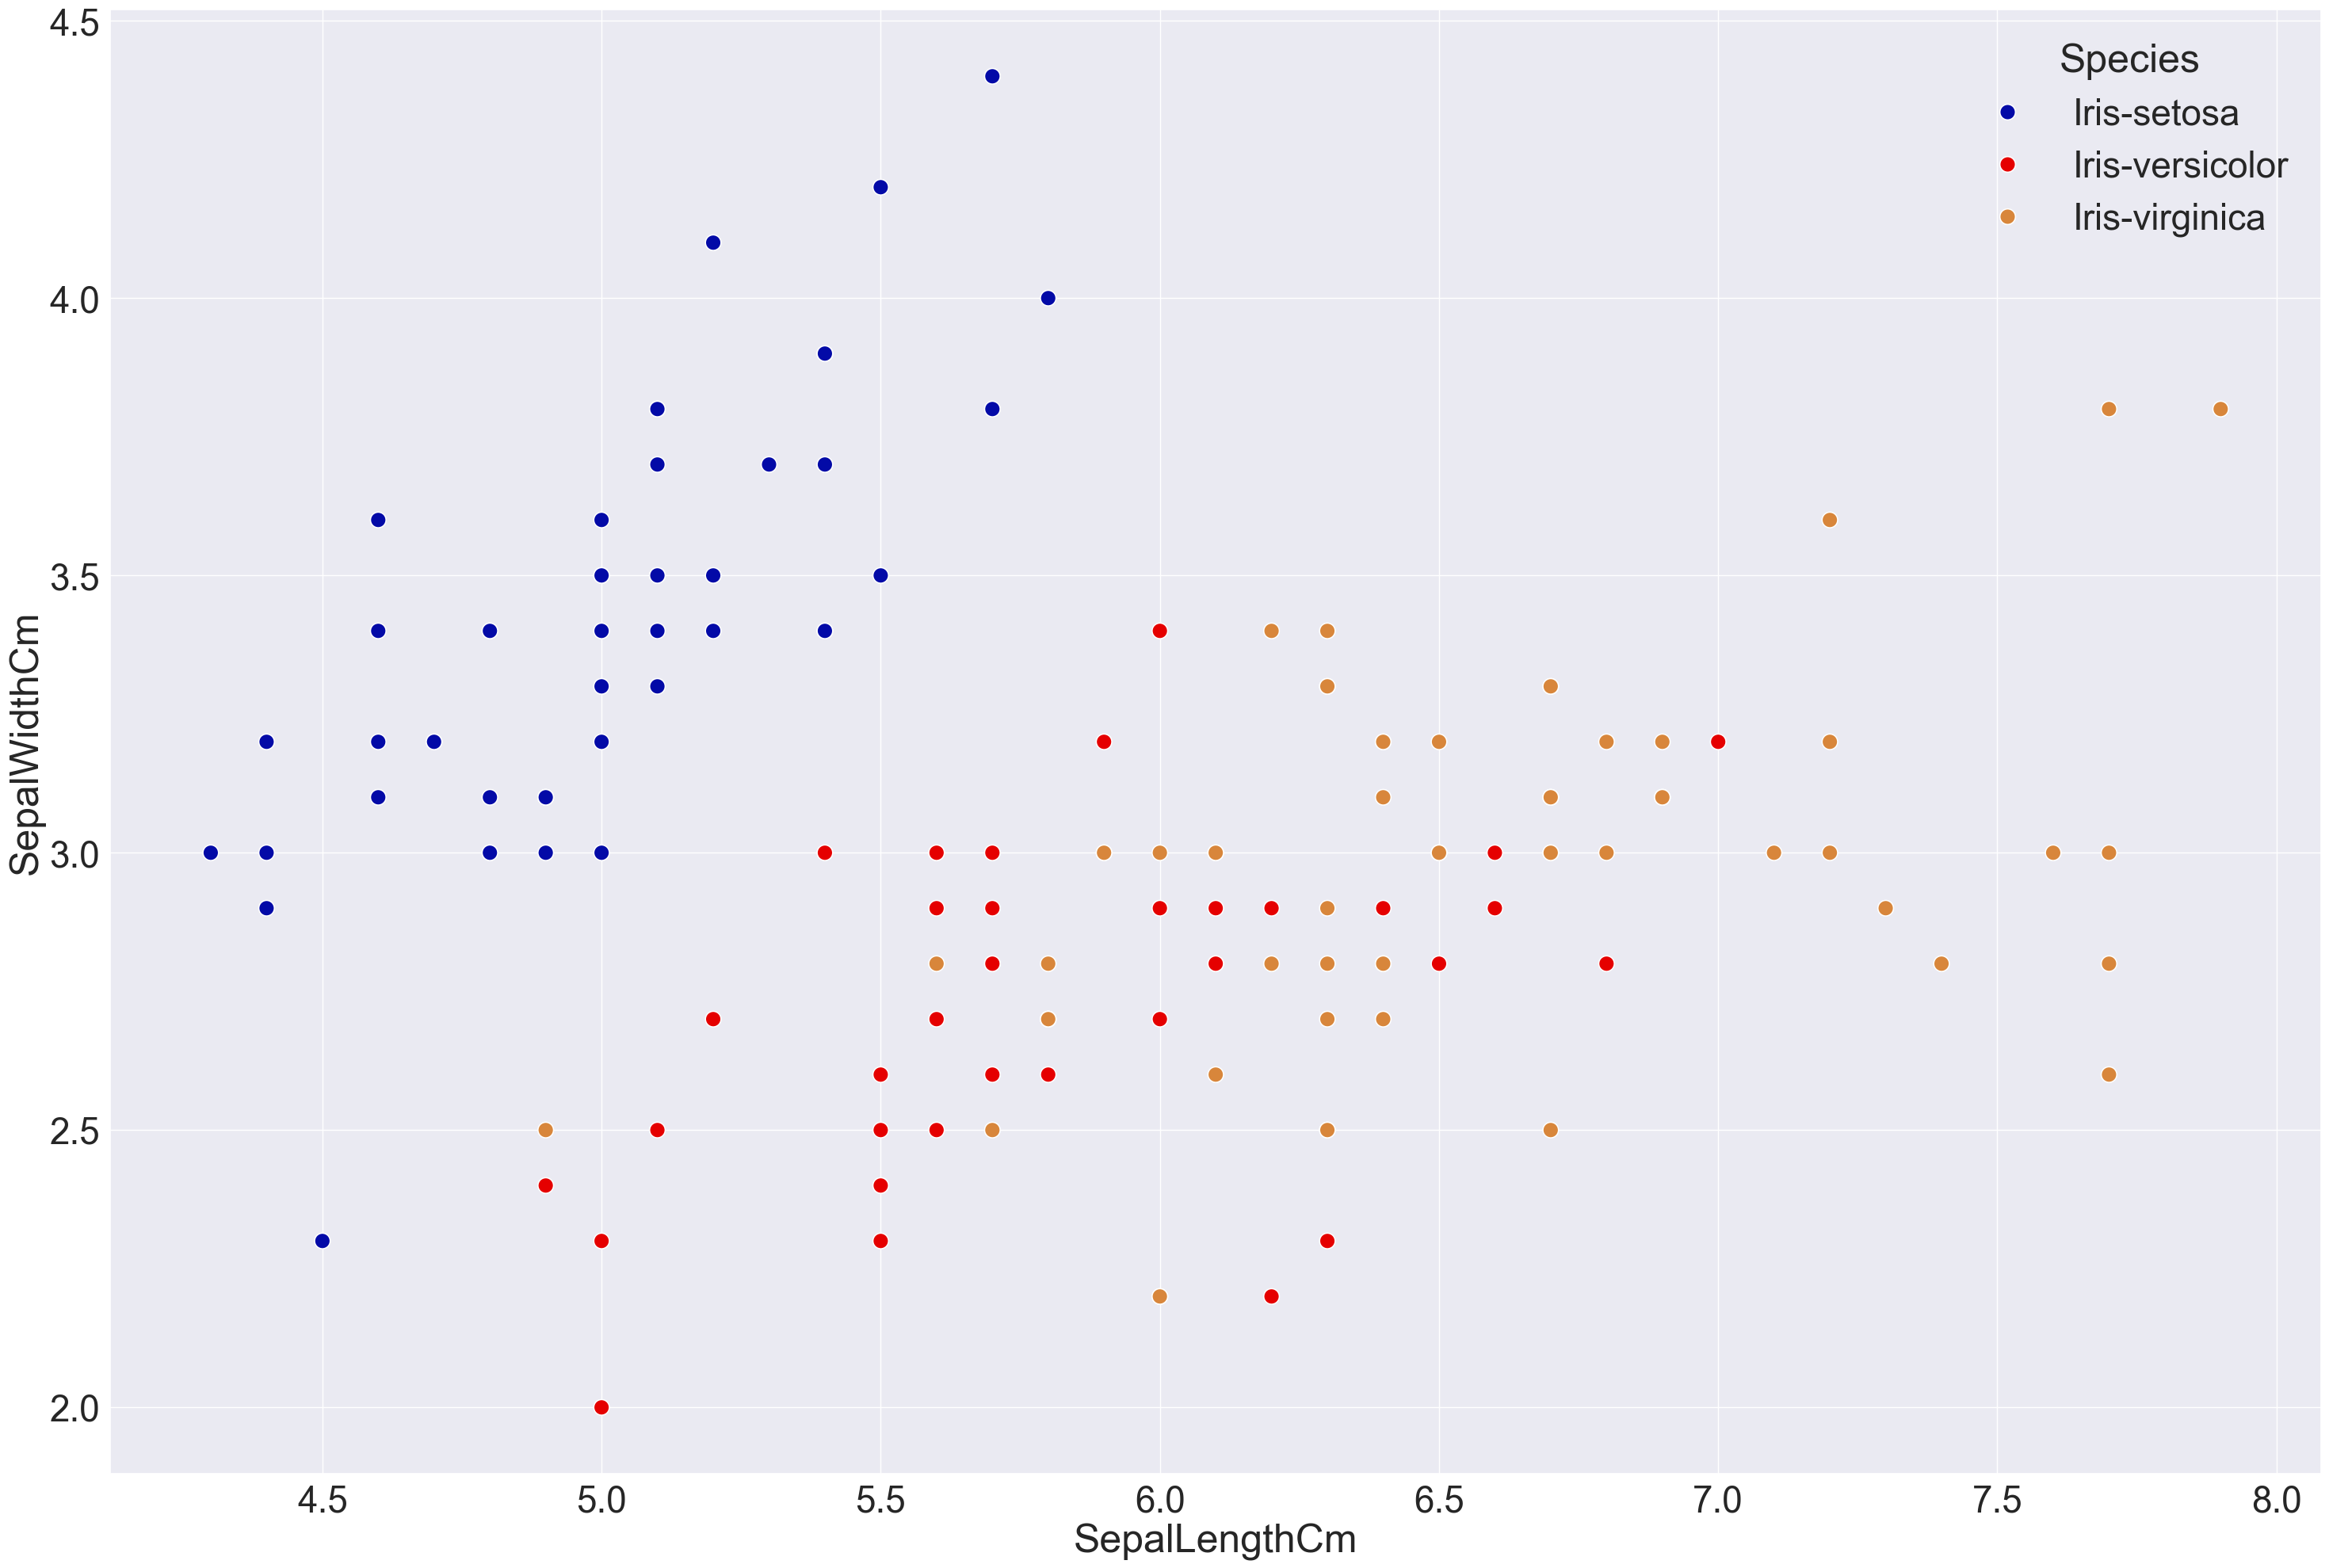

In [7]:
plt.figure(figsize=(36,24))
sns.scatterplot(x     = 'SepalLengthCm',
                y     = 'SepalWidthCm',
                hue   = 'Species', 
                data  = iris,
                s     = 200,
                palette= palette,
                );

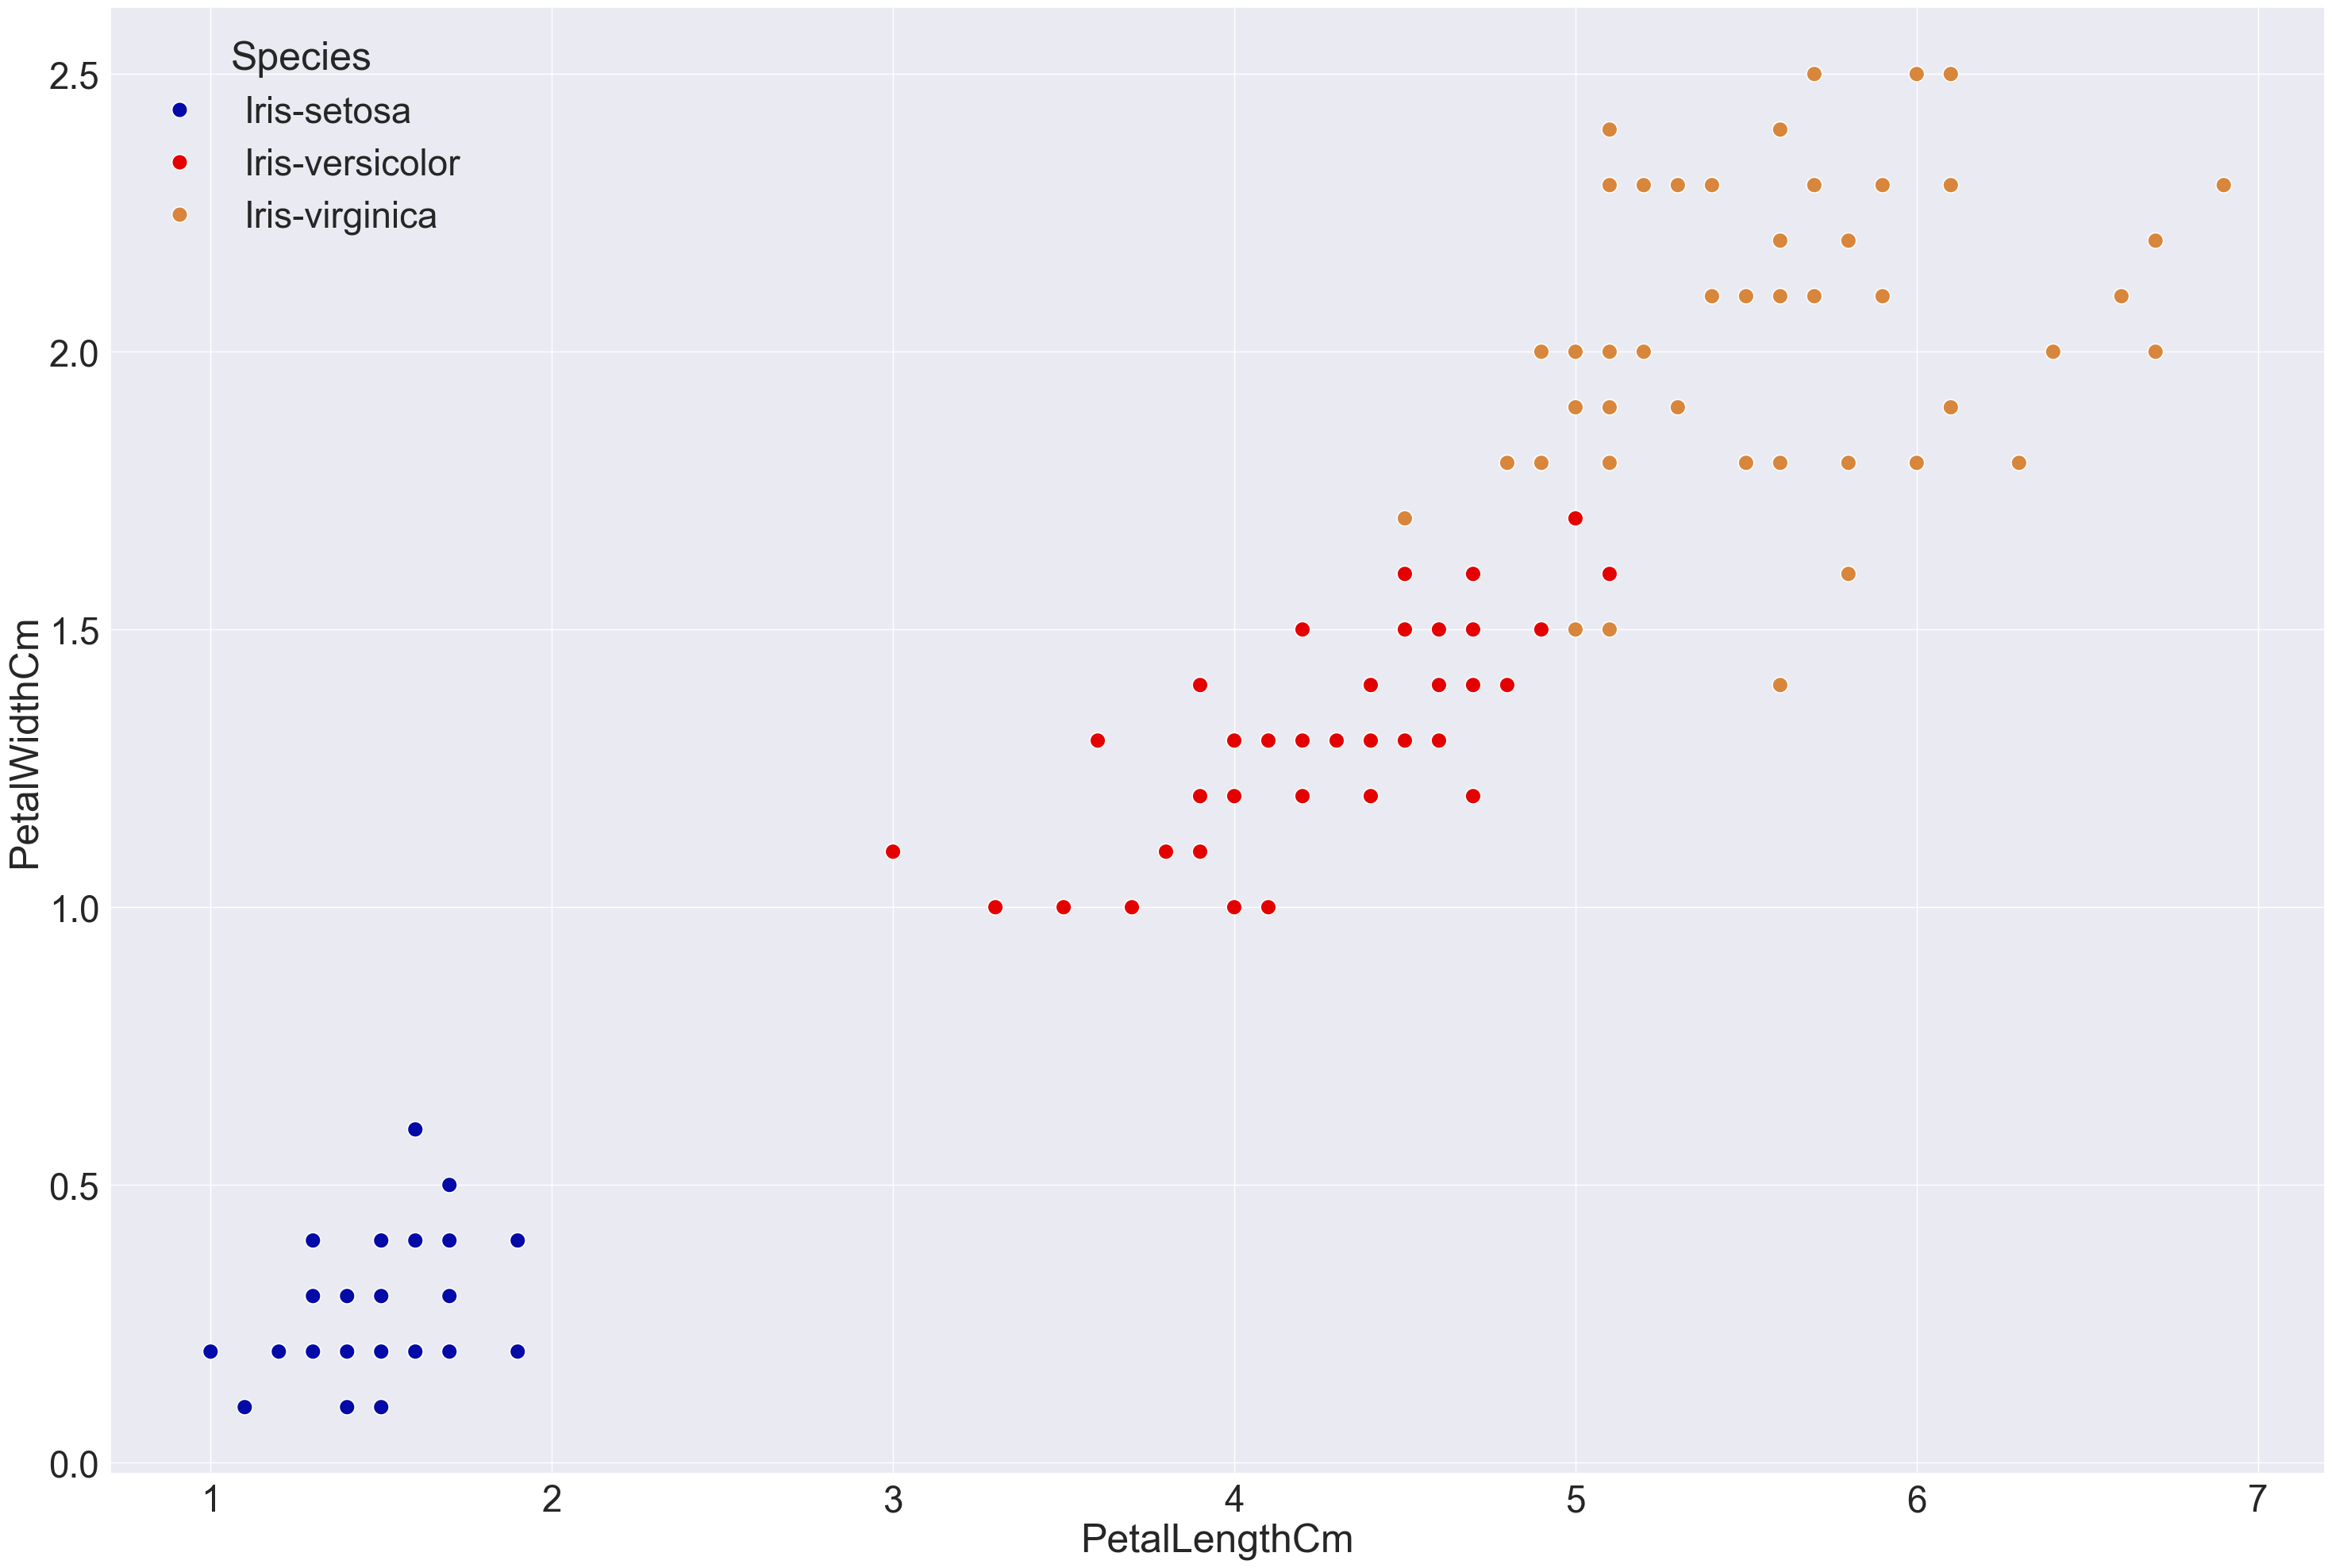

In [8]:
plt.figure(figsize=(36,24))
sns.scatterplot(x     = 'PetalLengthCm', 
                y     = 'PetalWidthCm',
                hue   = 'Species', 
                data  = iris,
                s     = 200,
                palette= palette,
                );

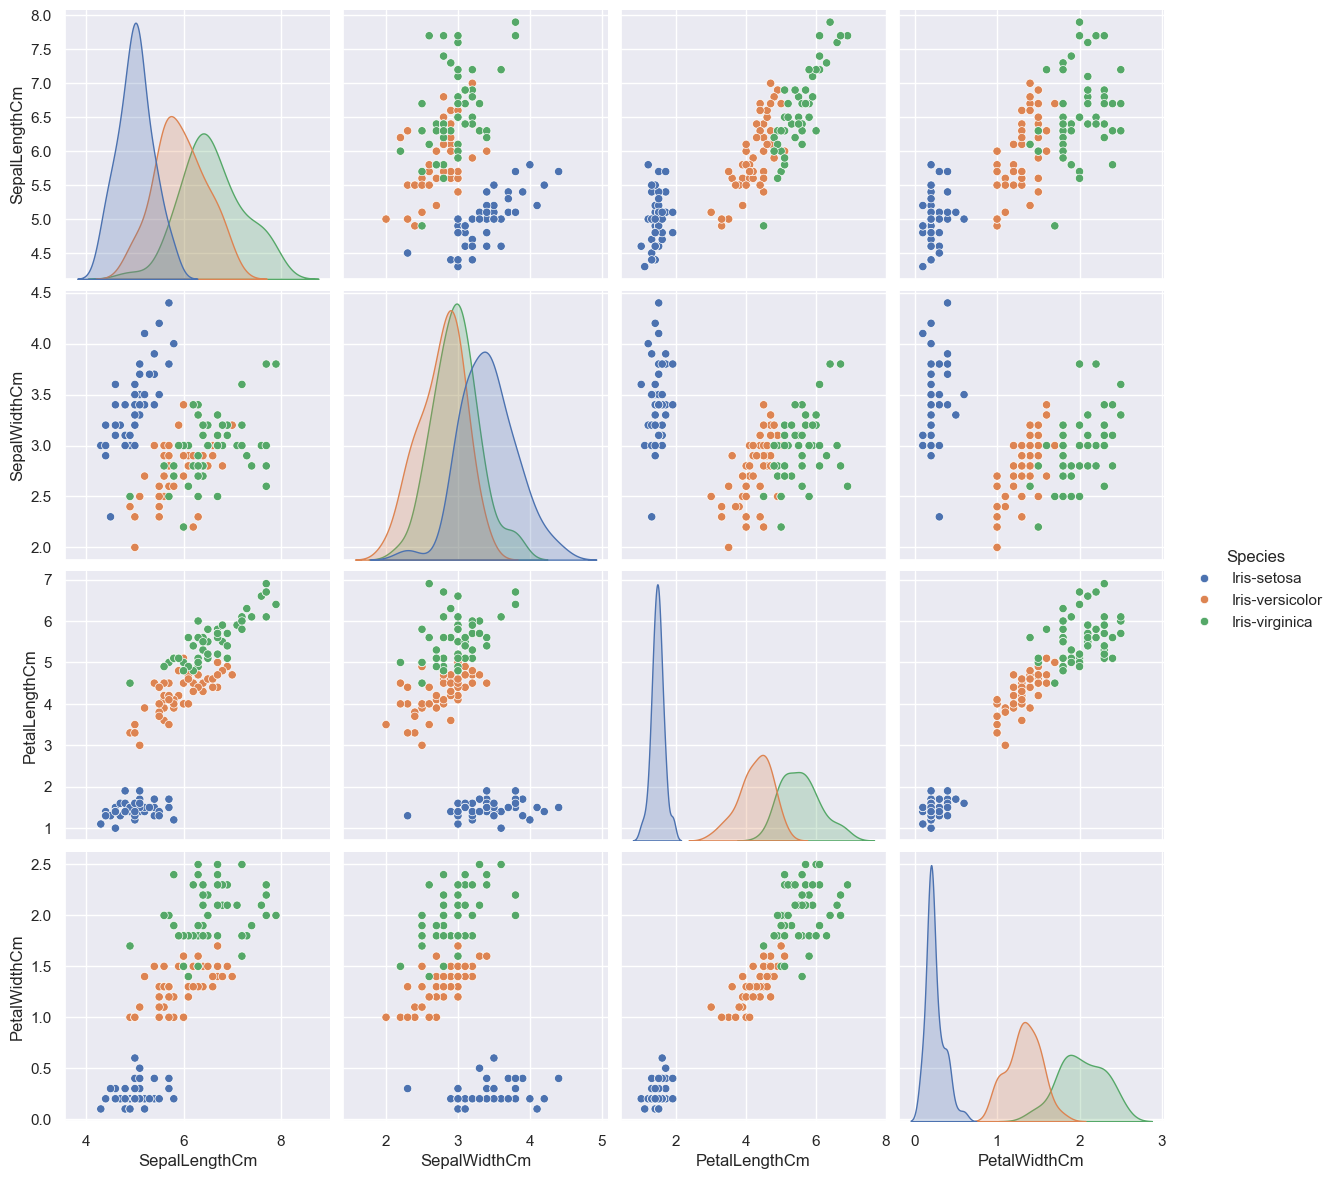

In [9]:
import seaborn as sns
sns.set()
sns.pairplot(iris, hue='Species', size=3);

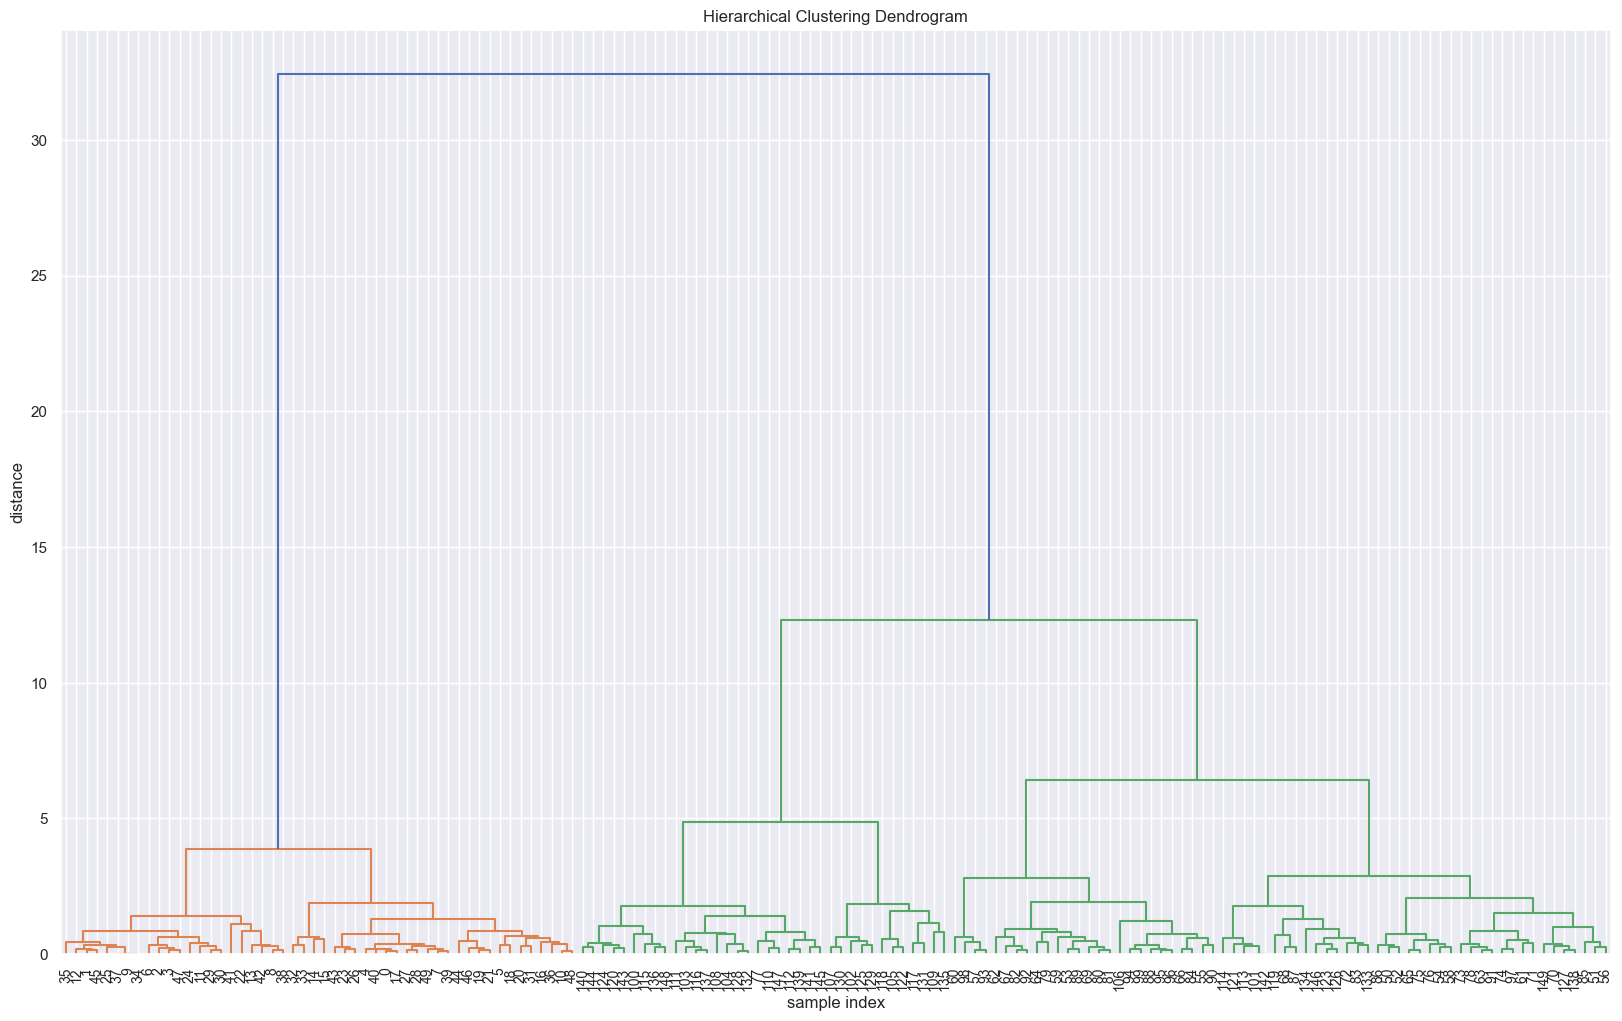

In [10]:
import numpy as np
import numpy as np               # linear algebra
import pandas as pd              # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns            #Statistical Data Visualization

import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

np.random.seed(123456789)
np.random.seed(987654321)
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(iris.iloc[:,0:4], method='ward')
plt.figure(figsize=(20,12))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram( Z,leaf_rotation=90.,leaf_font_size=10.)
plt.show()

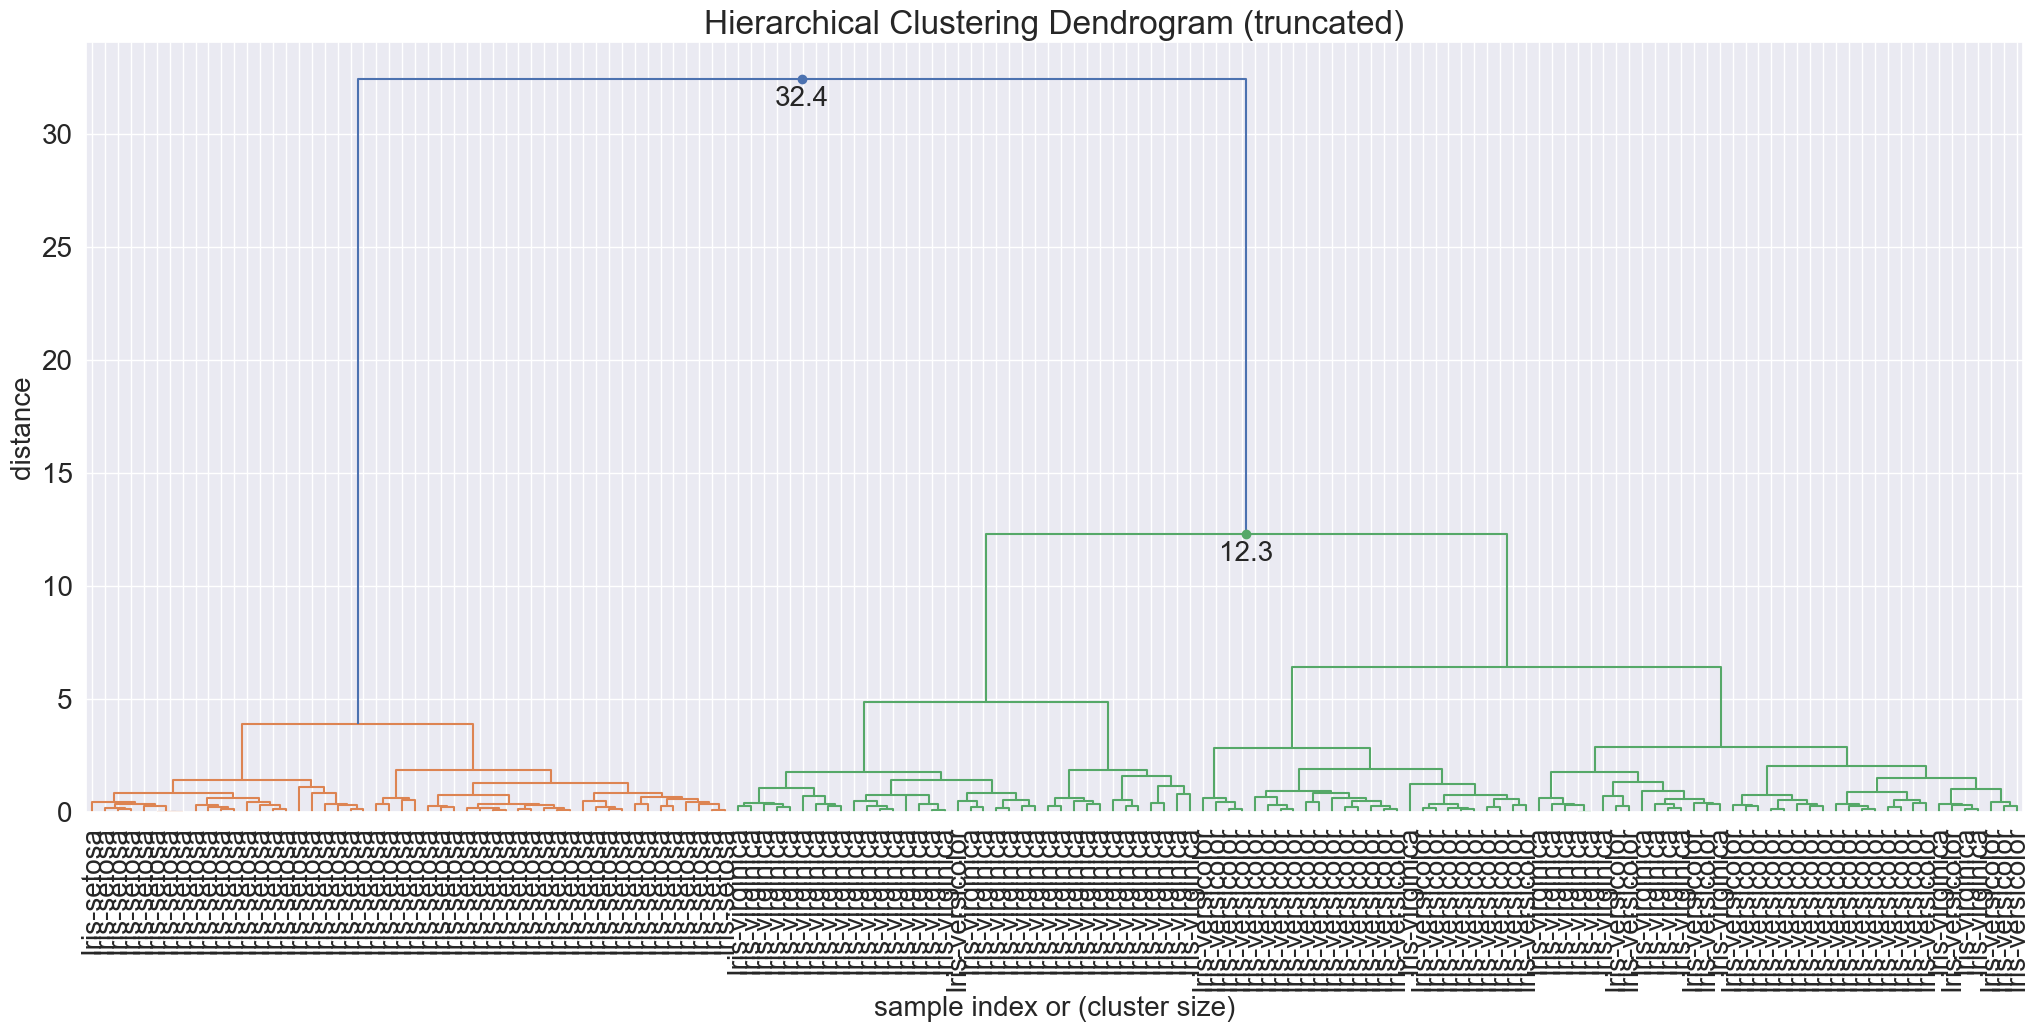

In [11]:
def afficheDendrogram(*args, **kwargs):
    font1 = fm.FontProperties(size=20)
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)', 
                  fontproperties=font2)
        plt.xlabel('sample index or (cluster size)', fontproperties=font1)
        plt.ylabel('distance', fontproperties=font1)
        plt.xticks(fontproperties=font1)
        plt.yticks(fontproperties=font1)
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center', fontproperties=font1)
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=500,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    labels = iris.Species.values
)
plt.show()

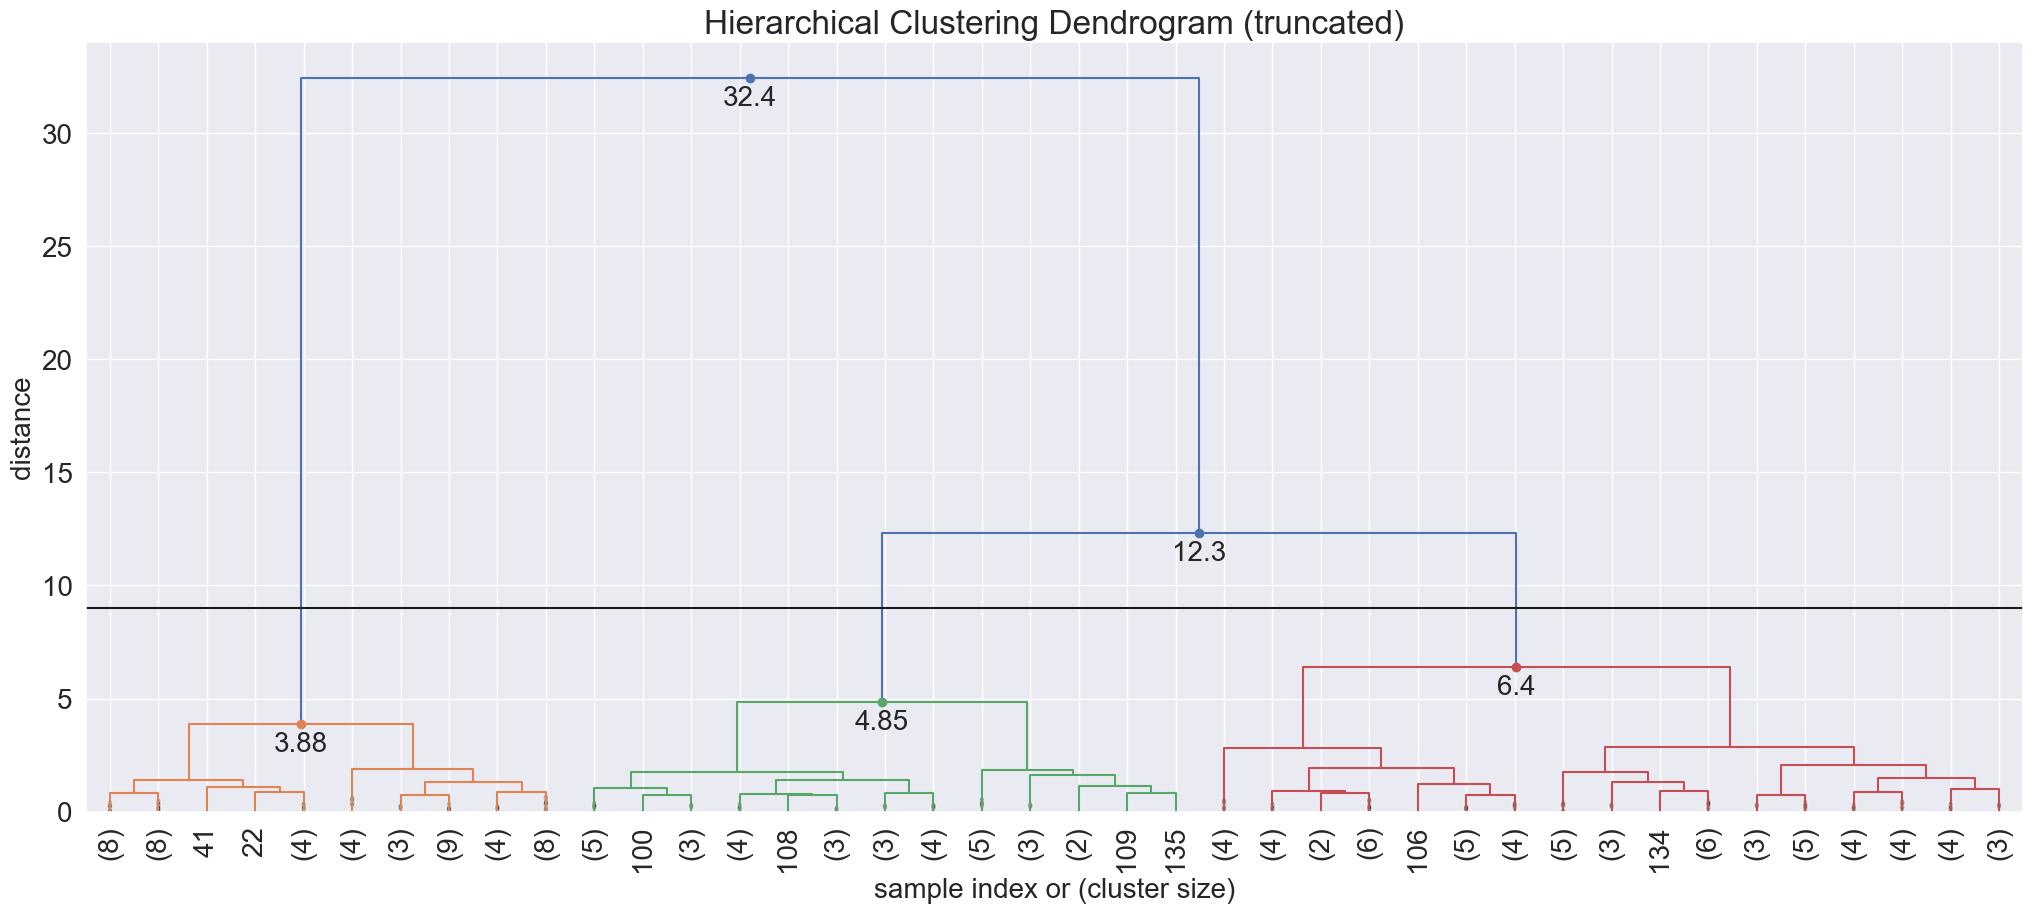

In [12]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=40,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=3,  # useful in small plots so annotations don't overlap
    max_d = 9
)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6808136202936816


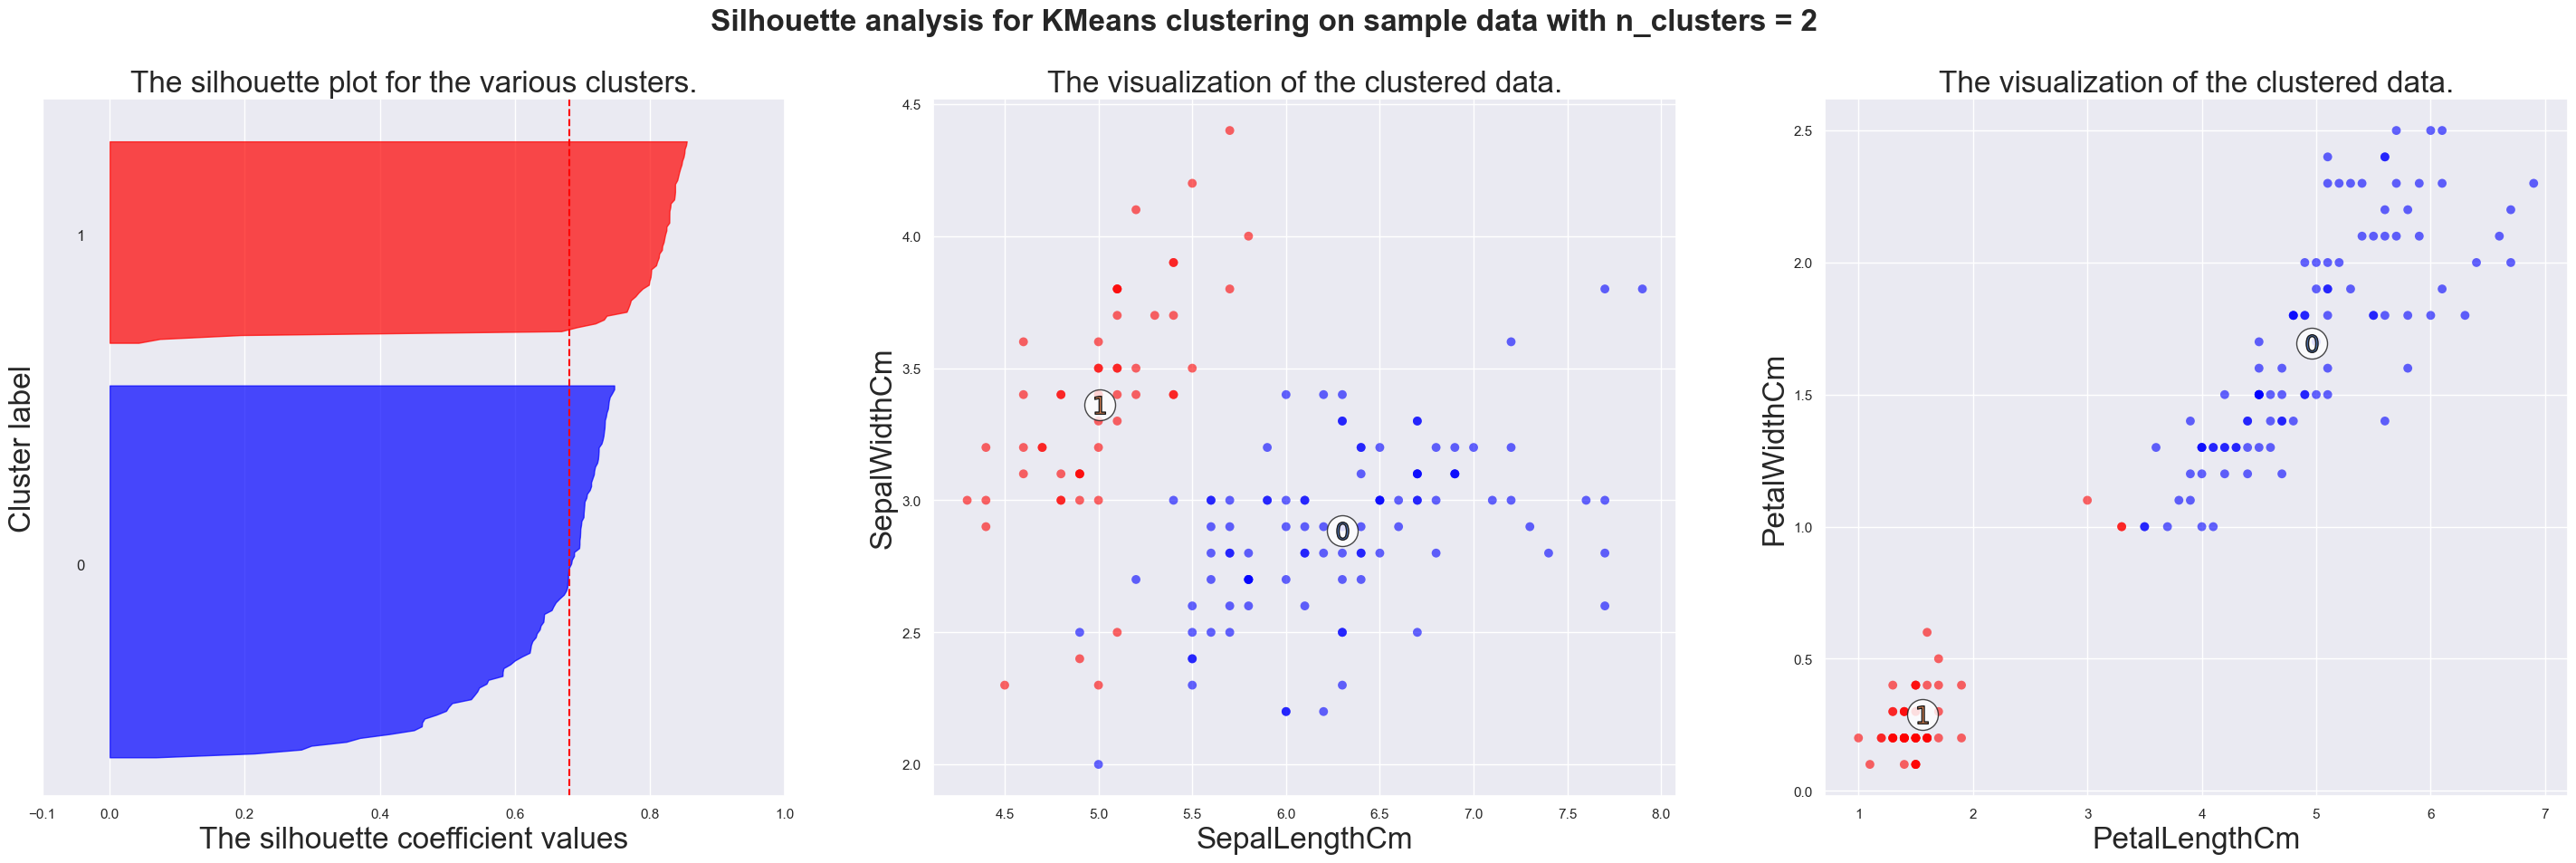

For n_clusters = 3 The average silhouette_score is : 0.5525919445499757


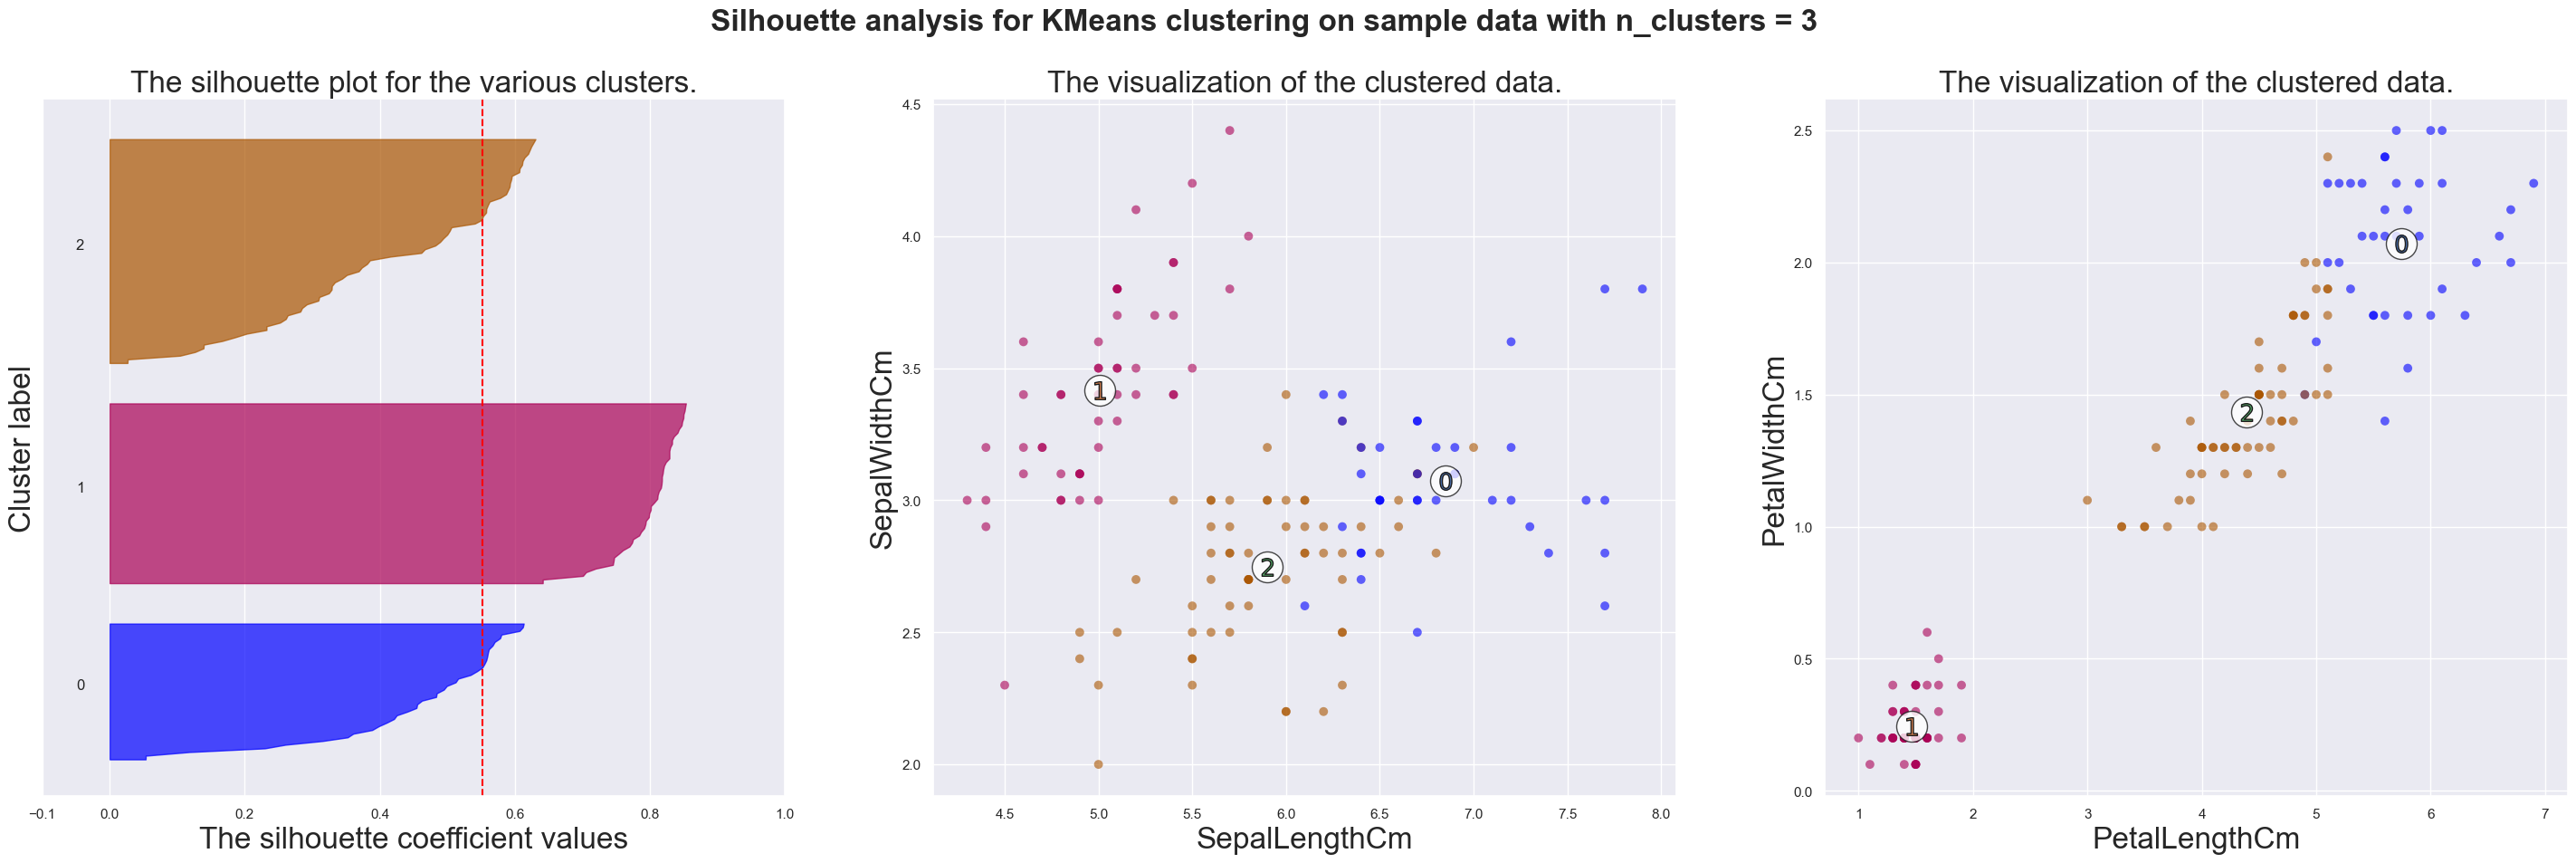

For n_clusters = 4 The average silhouette_score is : 0.4978256901095472


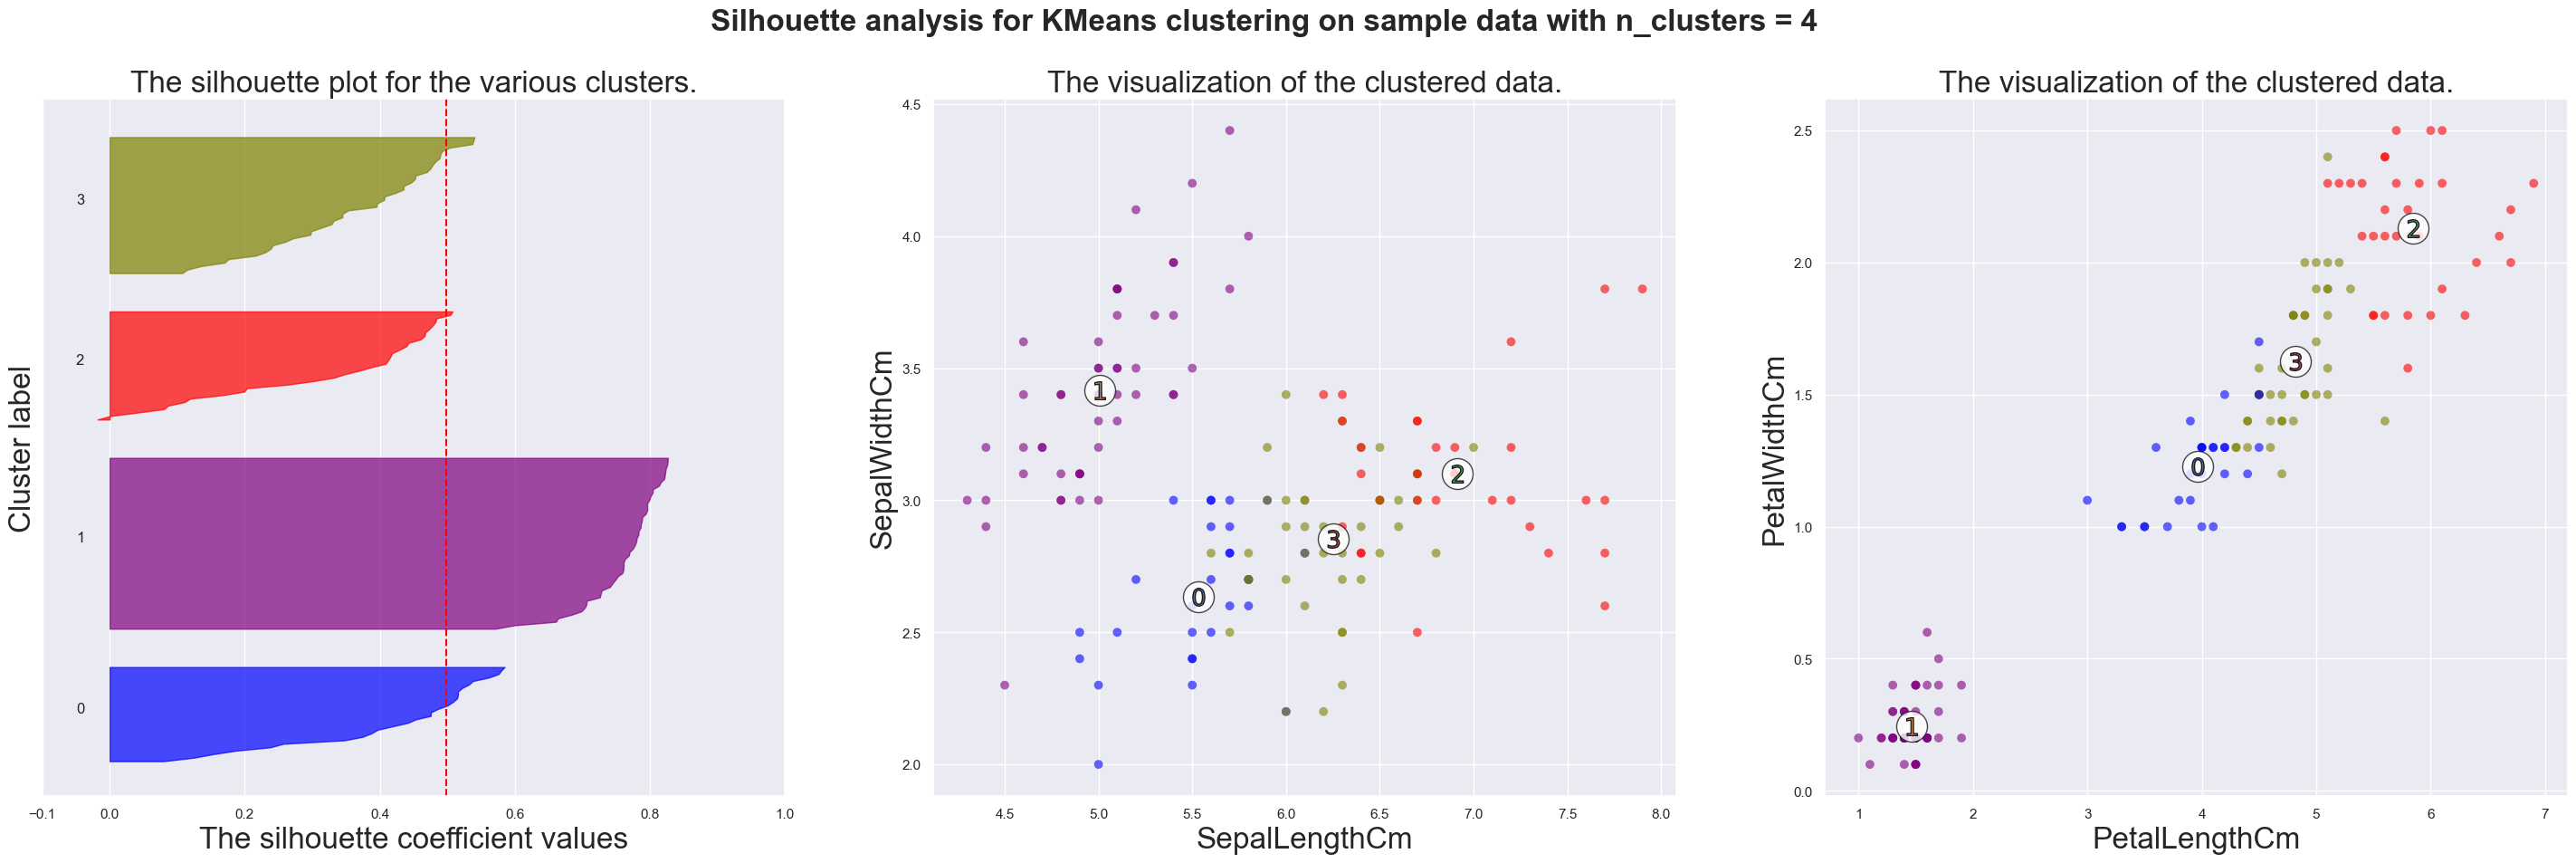

For n_clusters = 5 The average silhouette_score is : 0.4885175508886279


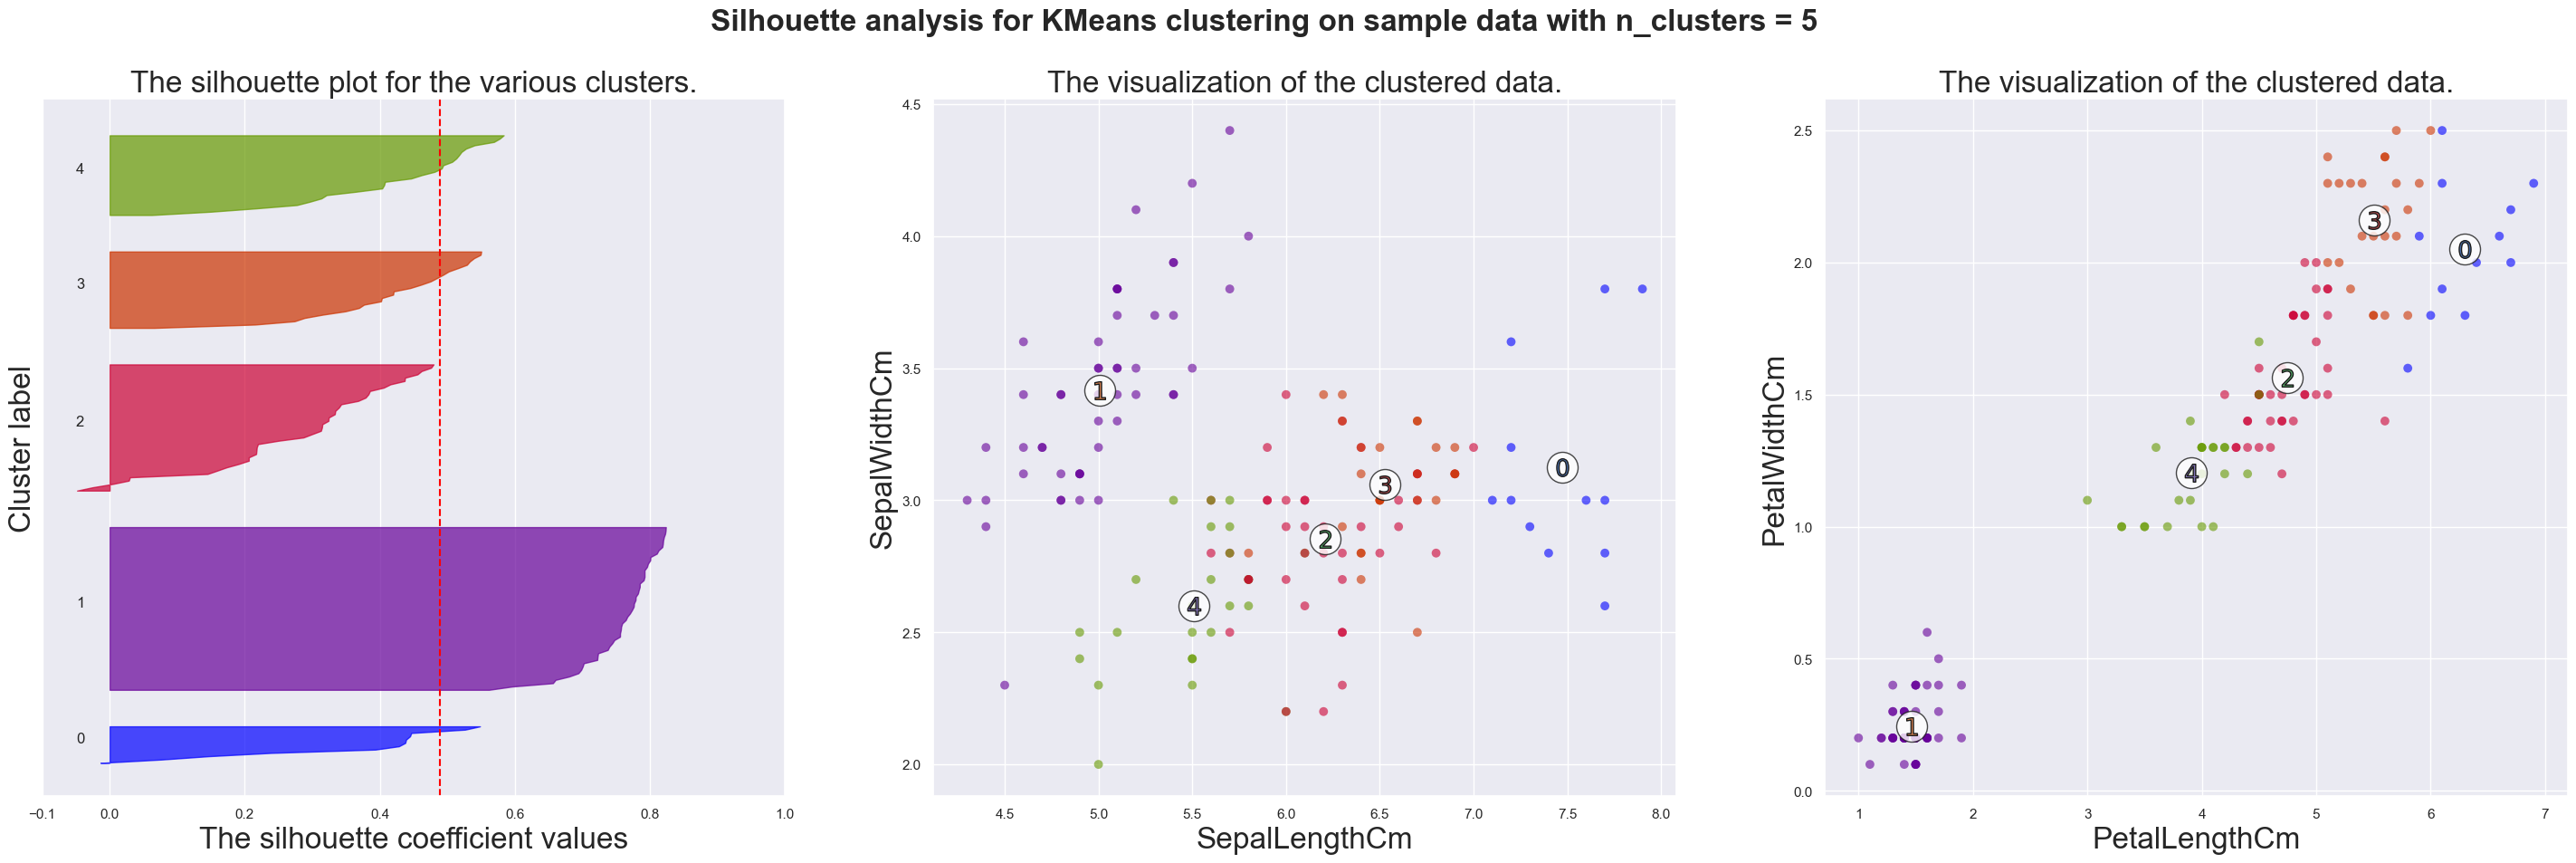

For n_clusters = 6 The average silhouette_score is : 0.36650401502359653


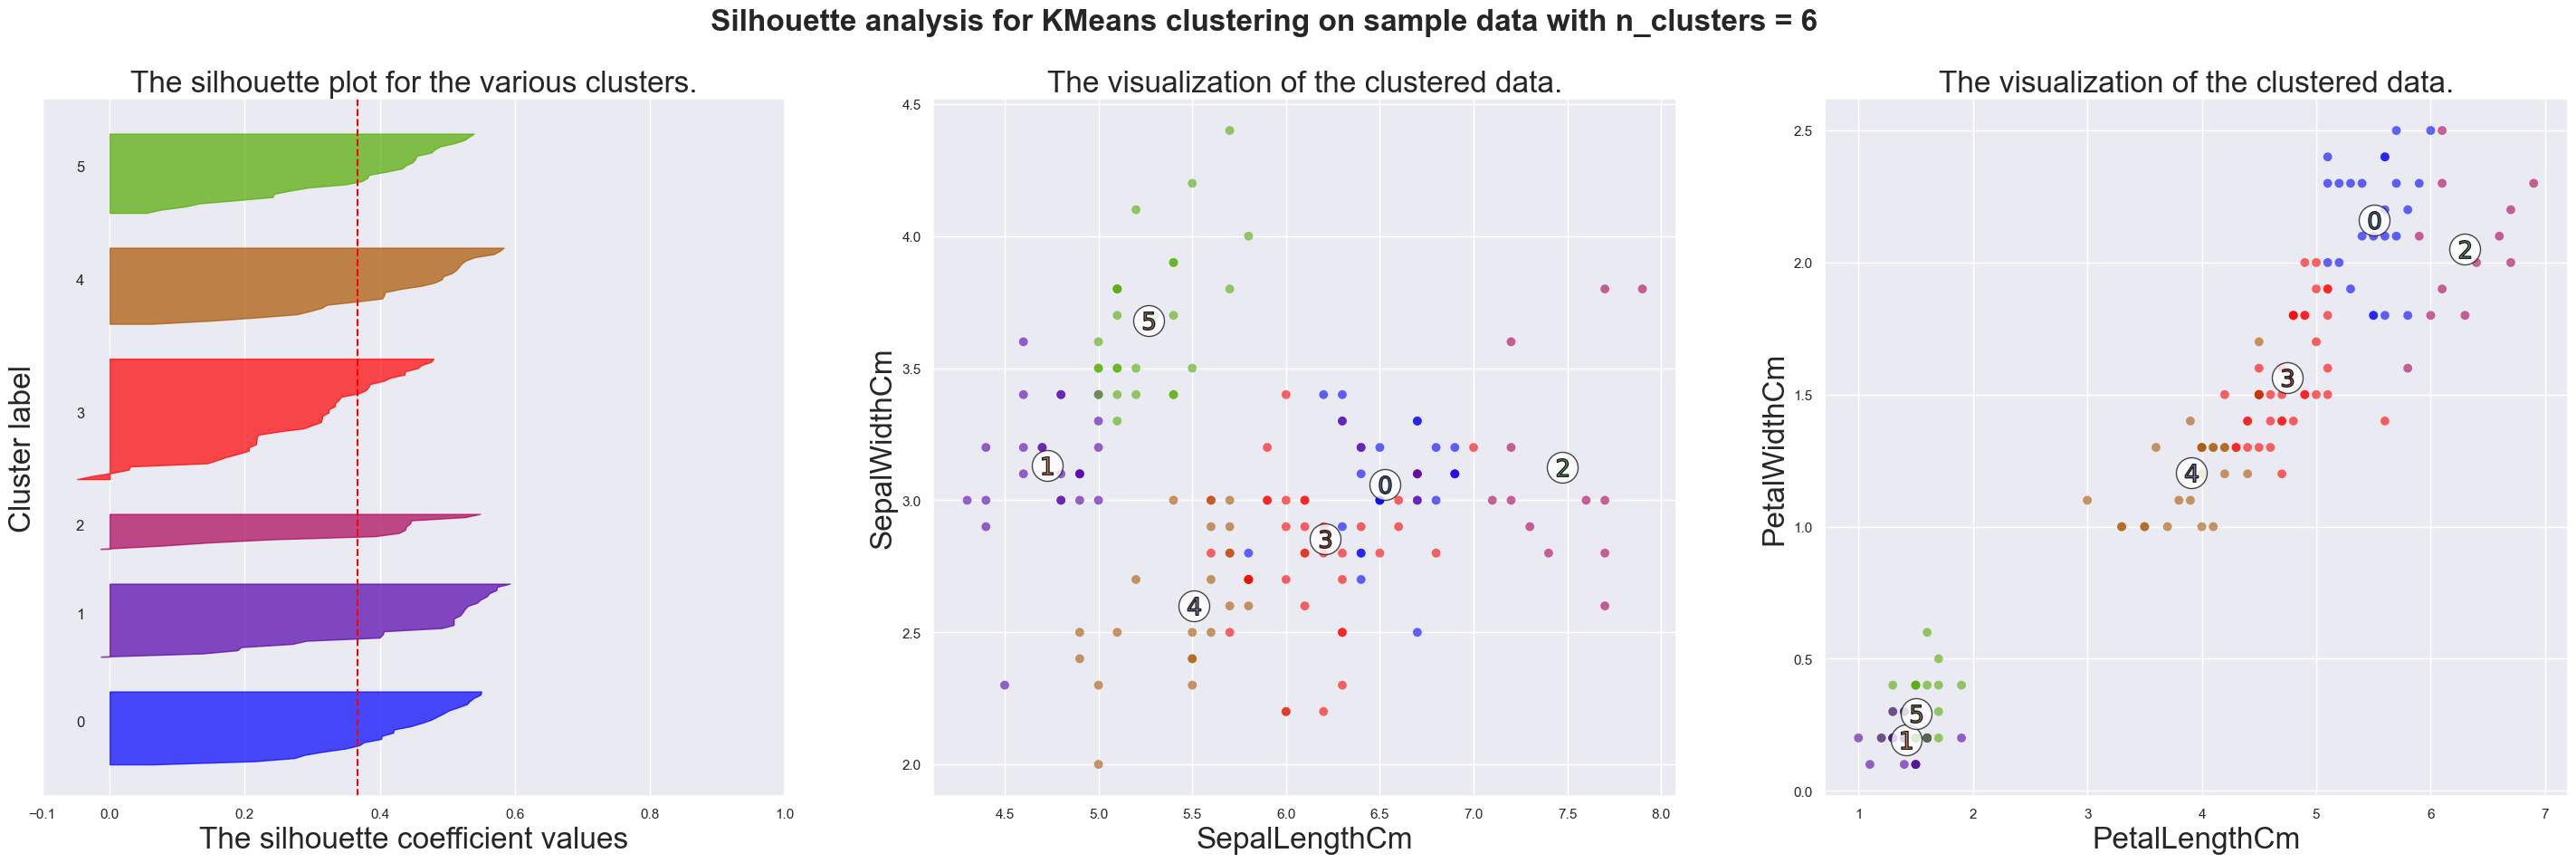

For n_clusters = 7 The average silhouette_score is : 0.3553790560401653


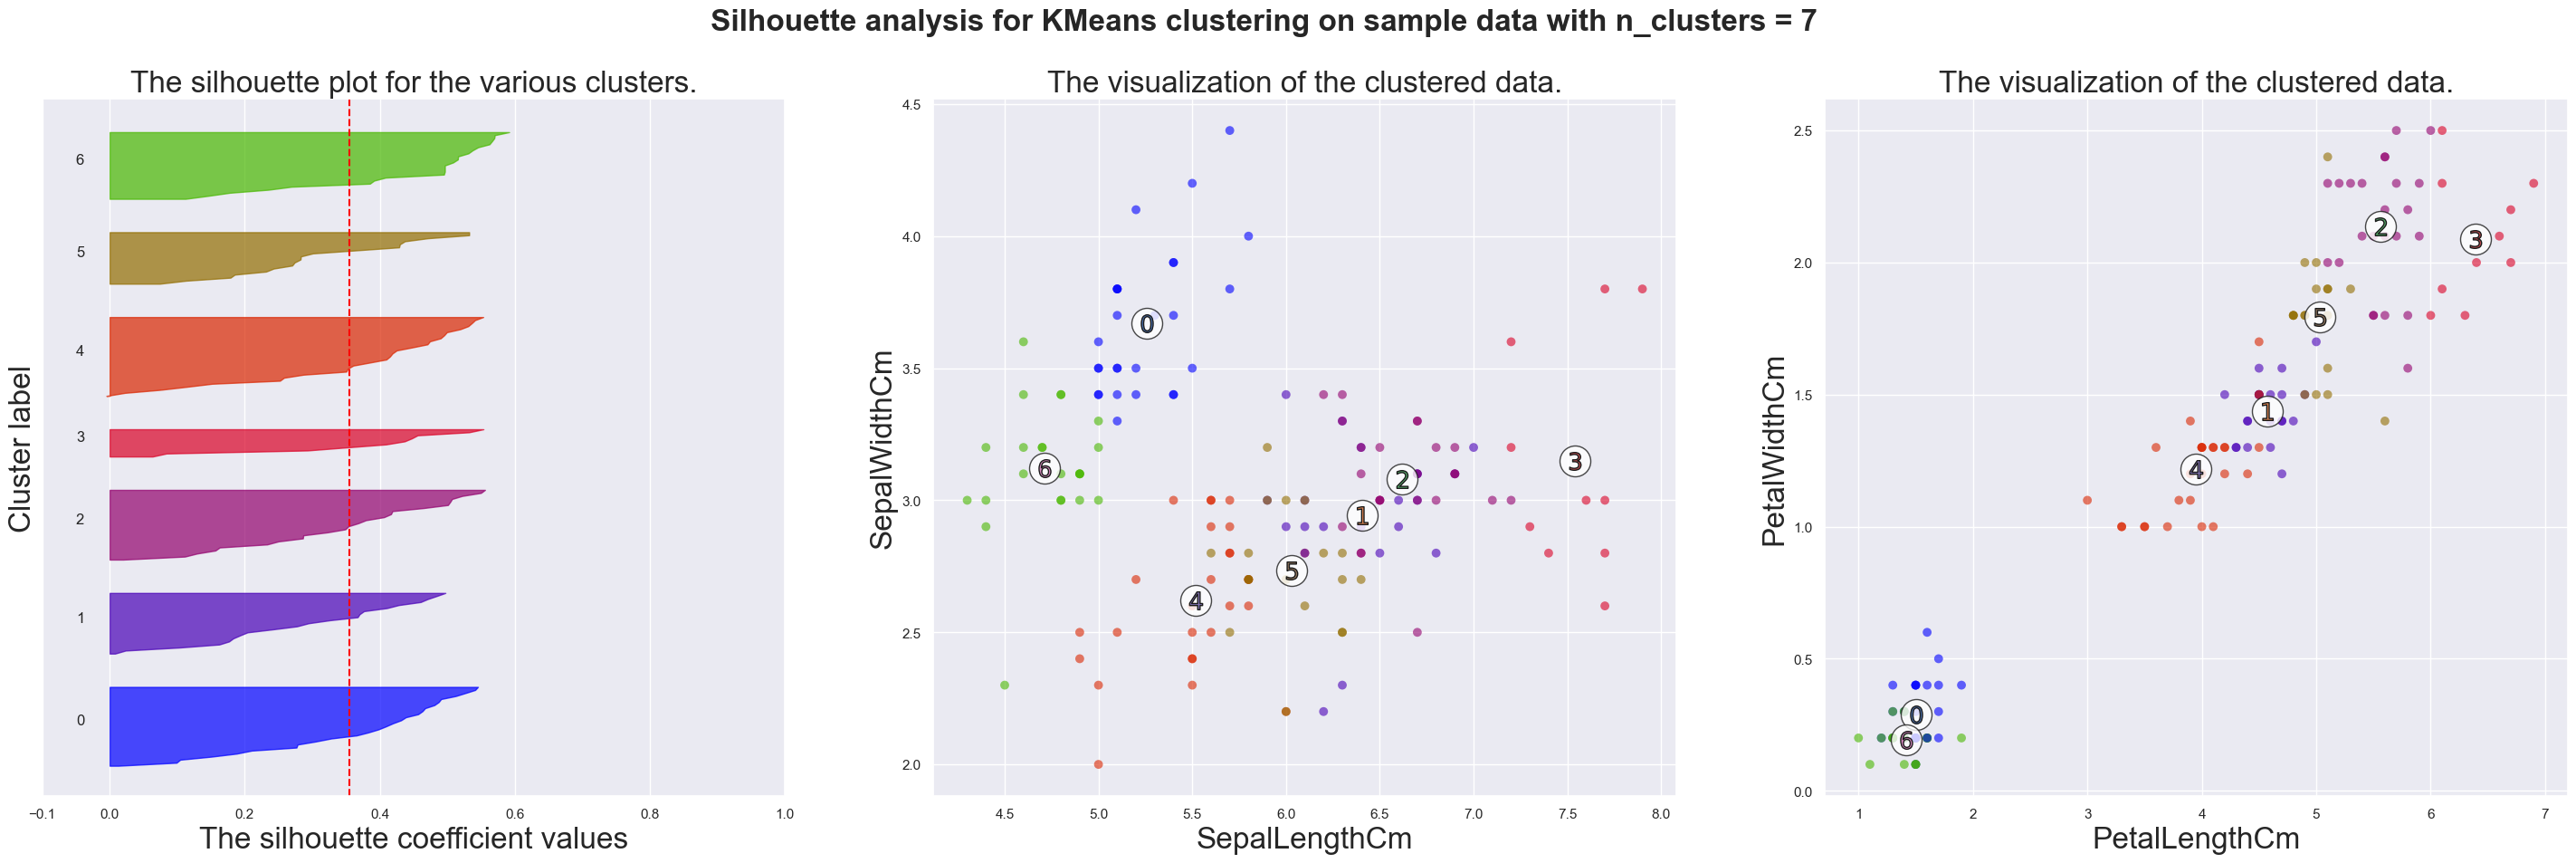

For n_clusters = 8 The average silhouette_score is : 0.35727034951869596


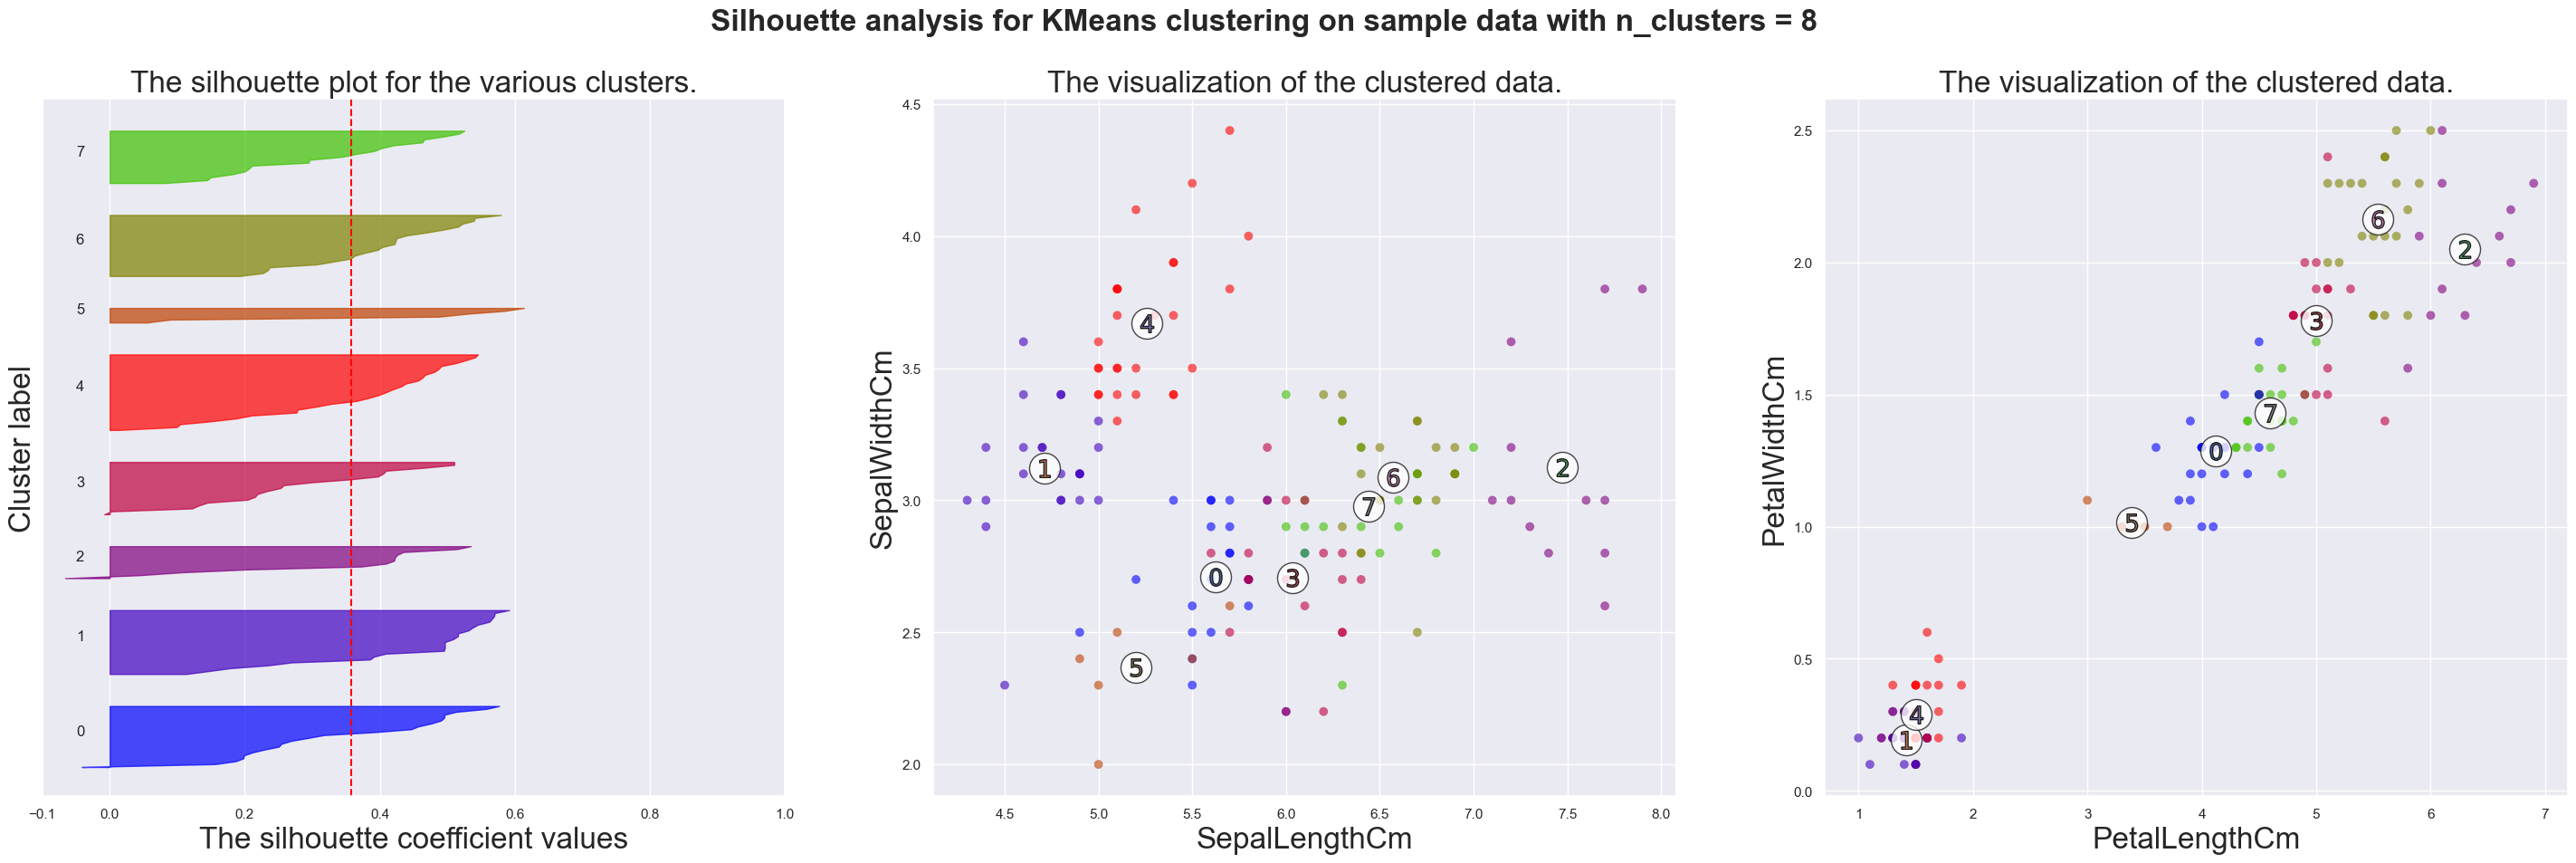

For n_clusters = 9 The average silhouette_score is : 0.32914588113144577


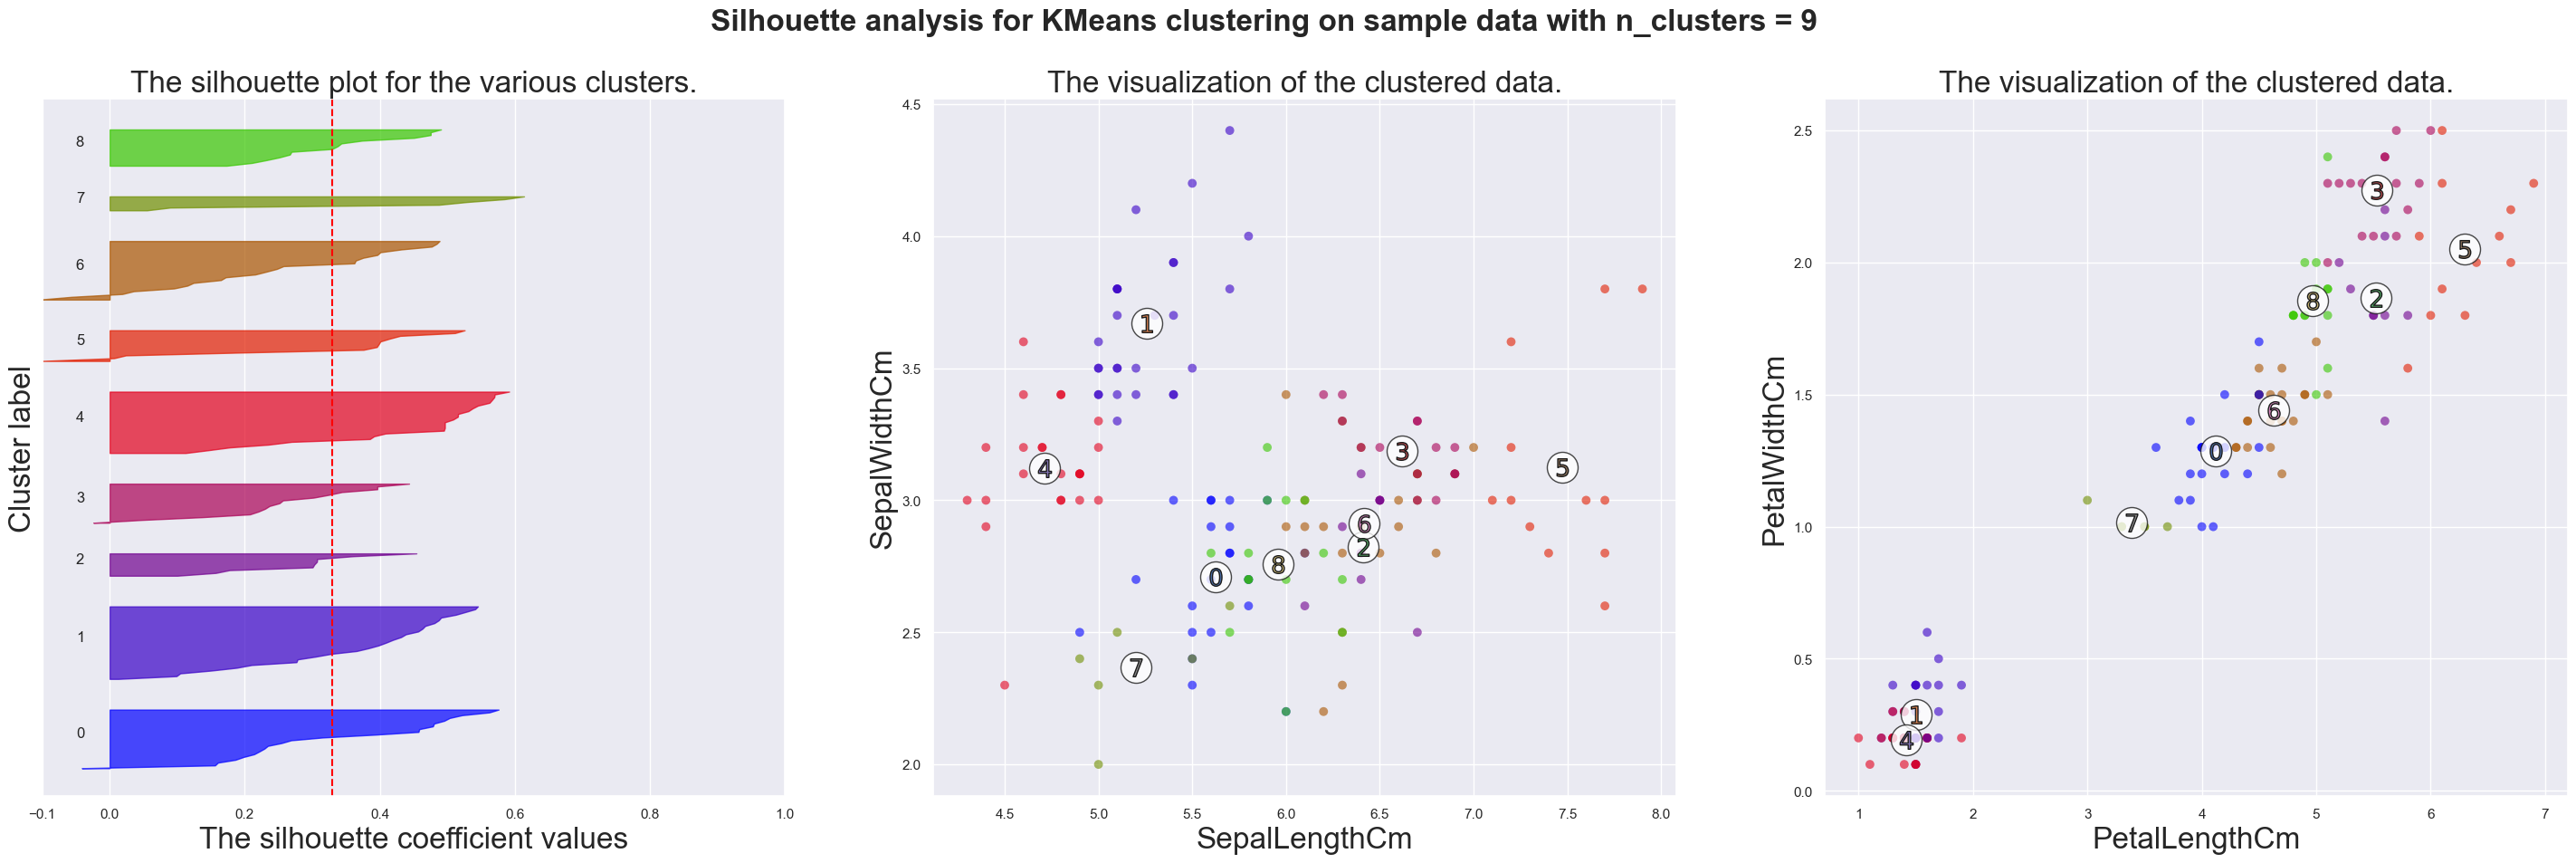

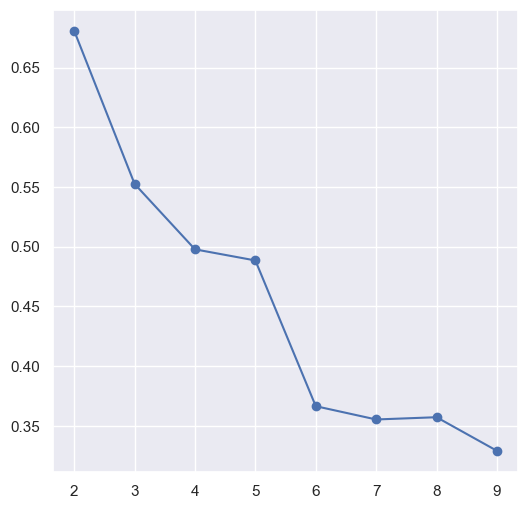

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = iris.iloc[:,0:4].values

cmap = cm.get_cmap("brg")
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

silhouettes = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(36, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i       
        
        color = cmap(float(i) / n_clusters)
        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.",fontsize=24)
    ax1.set_xlabel("The silhouette coefficient values",fontsize=24)
    ax1.set_ylabel("Cluster label",fontsize=24)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters )
    attribut01,attribut02 = 0,1
    nomColonne = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

    ax2.scatter(X[:, attribut01], X[:, attribut02], marker='.', s=200, lw=0, alpha=0.6,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, attribut01], centers[:, attribut02], marker='o',
                c="white", alpha=.8, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[attribut01], c[attribut02], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.",fontsize=24)
    ax2.set_xlabel(nomColonne[attribut01],fontsize=24)
    ax2.set_ylabel(nomColonne[attribut02],fontsize=24)

    attribut01,attribut02 = 2,3    

    ax3.scatter(X[:, attribut01], X[:, attribut02], marker='.', s=200, lw=0, alpha=0.6,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax3.scatter(centers[:, attribut01], centers[:, attribut02], marker='o',
                c="white", alpha=.8, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax3.scatter(c[attribut01], c[attribut02], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax3.set_title("The visualization of the clustered data.",fontsize=24)
    ax3.set_xlabel(nomColonne[attribut01],fontsize=24)
    ax3.set_ylabel(nomColonne[attribut02],fontsize=24)    

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=24, fontweight='bold')

    plt.show()
    
plt.figure(figsize=(6,6))
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()